In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os
folder_path = '/content/drive/MyDrive/formula-1'
os.chdir(folder_path)

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import gc
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore")


In [ ]:
black = '\033[30m'
red = '\033[31m'
green = '\033[32m'
yellow = '\033[33m'
blue = '\033[34m'
magenta = '\033[35m'
cyan = '\033[36m'
white = '\033[37m'
orange = "\033[38;5;208m"
bold = '\033[1m'
reset = '\033[0m'


In [ ]:
colors = {
    "Bold Red": "#FF0000",
    "Bold Green": "#00FF00",
    "Bold Blue": "#0000FF",
    "Bold Yellow": "#FFFF00",
    "Bold Cyan": "#00FFFF",
    "Bold Magenta": "#FF00FF",
    "Bold Orange": "#FFA500",
    "Bold Purple": "#800080",
    "Bold Pink": "#FFC0CB",
    "Bold Brown": "#A52A2A",
    "Bold Grey": "#808080",
    "Bold Black": "#000000",
    "Bold Light Blue": "#ADD8E6",
    "Bold Light Green": "#90EE90",
    "Bold Light Yellow": "#FFFFE0",
    "Bold Light Cyan": "#E0FFFF",
    "Bold Light Magenta": "#FFB6C1",
    "Bold Dark Red": "#8B0000",
    "Bold Dark Green": "#006400",
    "Bold Dark Blue": "#00008B",
    "Bold Dark Orange": "#FF8C00",
    "Bold Dark Purple": "#4B0082",
    "Bold Dark Pink": "#FF1493",
    "Bold Dark Brown": "#654321",
    "Bold Dark Grey": "#A9A9A9",
    "Bold Neon Green": "#39FF14",
    "Bold Neon Pink": "#FF6EC7",
    "Bold Neon Blue": "#1B03A3",
    "Bold Neon Yellow": "#FFFF33",
    "Bold Neon Orange": "#FF5F1F"
}

In [ ]:
def convert_to_timedelta(df , columns_name):
    for col in columns_name:
        df[col] = pd.to_timedelta(df[col])
    return df

def conver_to_datetime(df , columns_name):
    for col in columns_name:
        df[col] = pd.to_datetime(df[col])
    return df

def conver_deltatime_to_second (df , columns_name):
    for col in columns_name:
        df[f'{col}_in_sec'] = df[col].dt.total_seconds()
    return df

 ### **lap** 2024

In [ ]:
df  = pd.read_csv('/content/drive/MyDrive/formula-1/ocean_data_challenge_F1_data/races_2024/lap_2024.csv')
df.head(5)

,EventName,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,Bahrain Grand Prix,0 days 01:01:37.510000,VER,1,0 days 00:01:37.284000,1.0,1.0,NaN,NaN,NaN,...,False,Red Bull Racing,0 days 00:59:59.911000,2024-03-02 15:03:42.342,12,1.0,False,NaN,False,False
1,Bahrain Grand Prix,0 days 01:03:13.806000,VER,1,0 days 00:01:36.296000,2.0,1.0,NaN,NaN,0 days 00:00:30.916000,...,False,Red Bull Racing,0 days 01:01:37.510000,2024-03-02 15:05:19.941,1,1.0,False,NaN,False,True
2,Bahrain Grand Prix,0 days 01:04:50.559000,VER,1,0 days 00:01:36.753000,3.0,1.0,NaN,NaN,0 days 00:00:30.999000,...,False,Red Bull Racing,0 days 01:03:13.806000,2024-03-02 15:06:56.237,1,1.0,False,NaN,False,True
3,Bahrain Grand Prix,0 days 01:06:27.206000,VER,1,0 days 00:01:36.647000,4.0,1.0,NaN,NaN,0 days 00:00:30.931000,...,False,Red Bull Racing,0 days 01:04:50.559000,2024-03-02 15:08:32.990,1,1.0,False,NaN,False,True
4,Bahrain Grand Prix,0 days 01:08:04.379000,VER,1,0 days 00:01:37.173000,5.0,1.0,NaN,NaN,0 days 00:00:31.255000,...,False,Red Bull Racing,0 days 01:06:27.206000,2024-03-02 15:10:09.637,1,1.0,False,NaN,False,True


In [ ]:
deltaTime_cols = ['Time', 'LapTime', 'Sector1Time', 'Sector2Time', 'Sector3Time' ,
                  'Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime',
                  'LapStartTime', 'PitOutTime', 'PitInTime']
df= convert_to_timedelta(df , deltaTime_cols)
df = conver_deltatime_to_second (df , deltaTime_cols)
print(f'{orange}{bold}lap_2024 : {reset} {df.shape} ')
for col in df.columns:
    print(f'{bold}{col} : {reset} |nnull: {yellow}{df[col].isnull().sum()} {reset} |nunique: {green}{df[col].nunique()} {reset} | {red}{df[col].dtype} {reset}|{blue}{list (df[col].unique())} {reset} ' )


In [ ]:
(df.isnull().sum()/len(df))*100

,0
EventName,0.000000
Time,0.000000
Driver,0.000000
DriverNumber,0.000000
LapTime,0.659931
LapNumber,0.000000
Stint,0.000000
PitOutTime,96.764586
PitInTime,96.752905
Sector1Time,1.956433


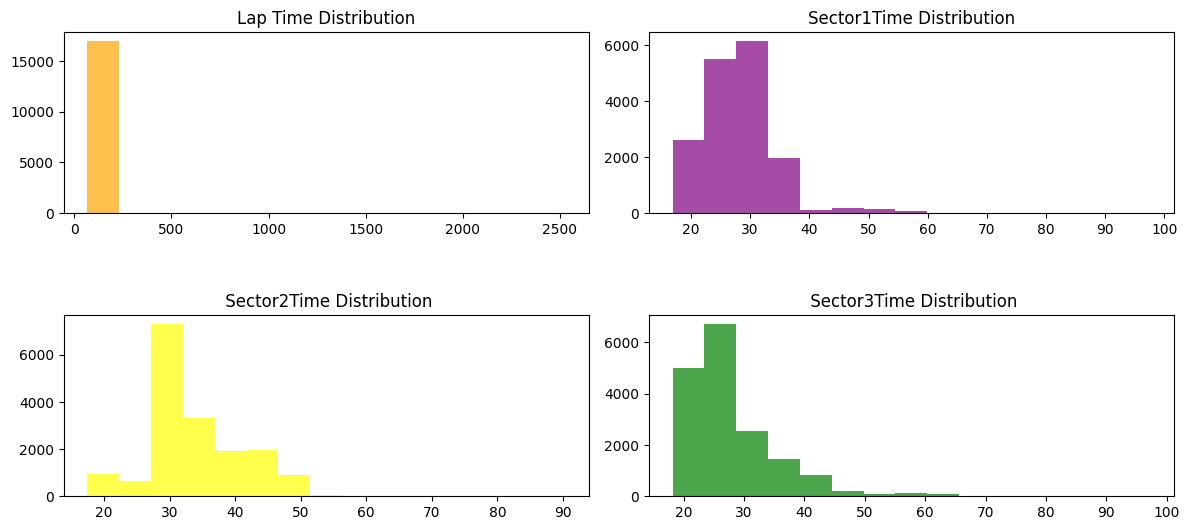

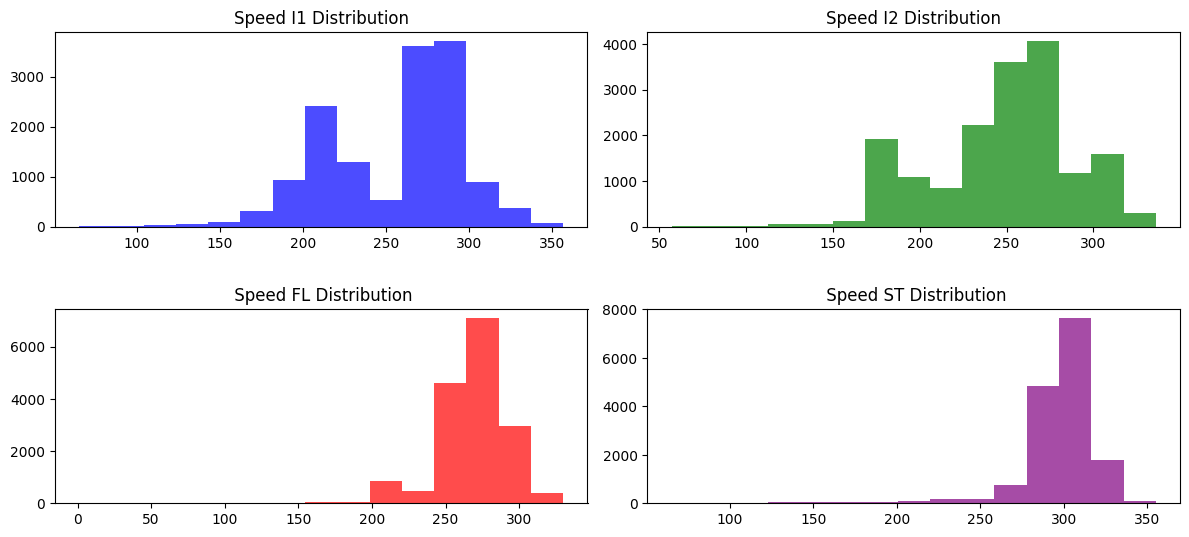

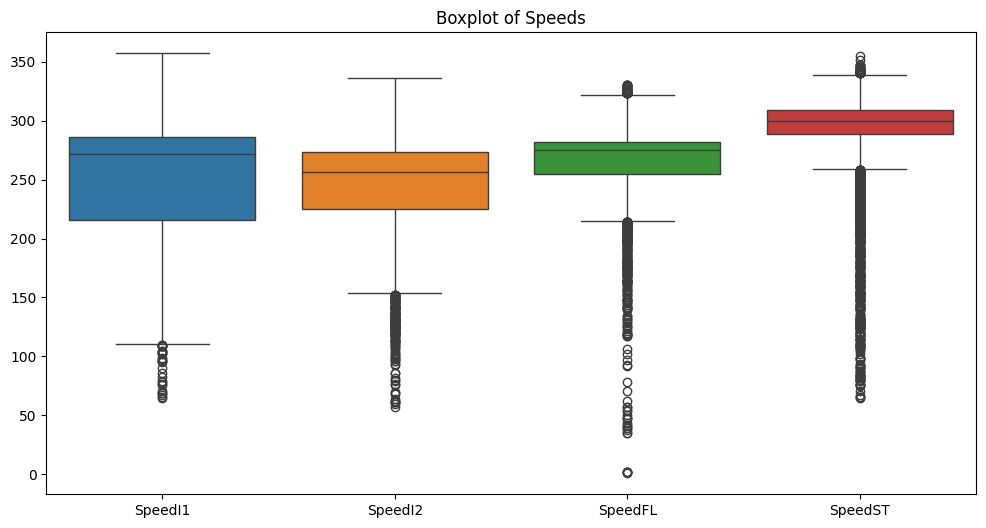

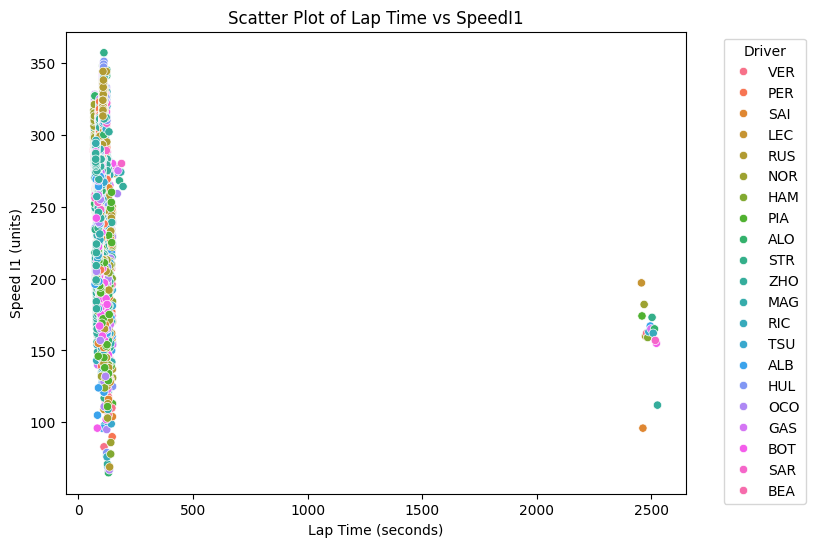

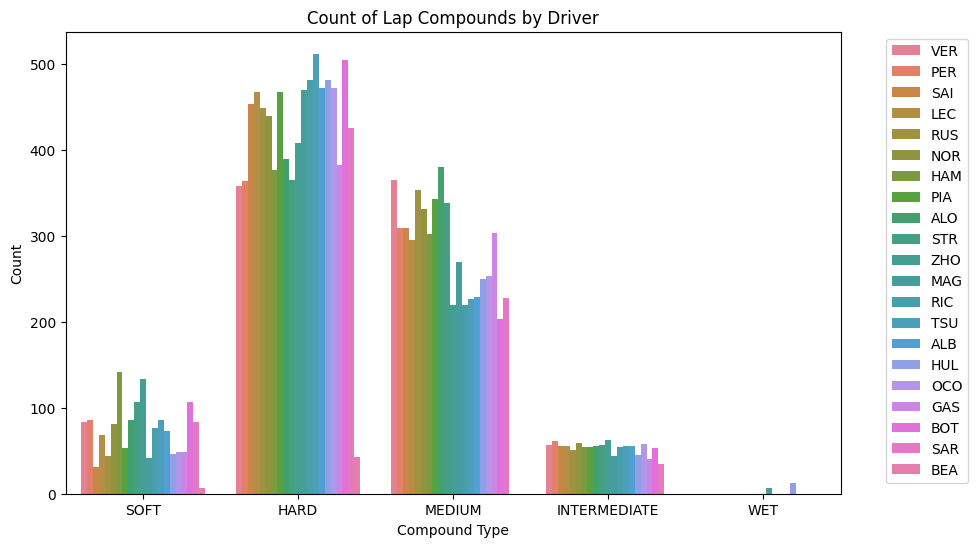

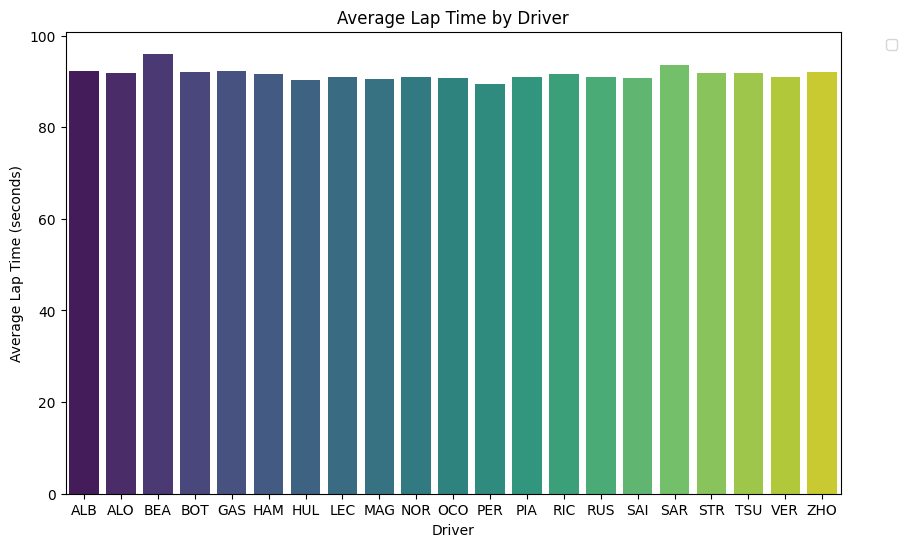

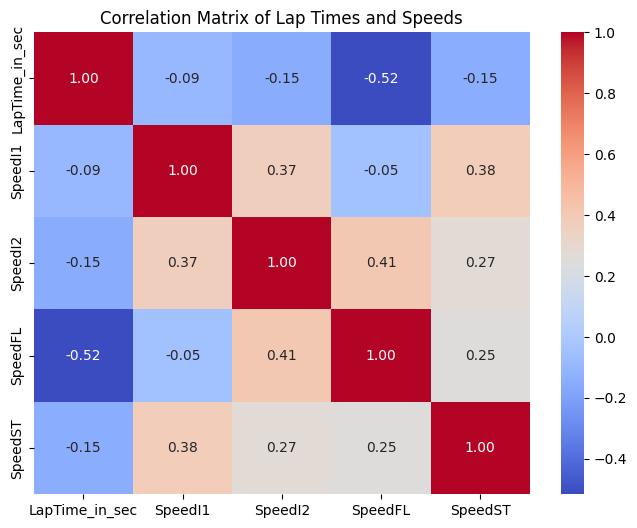

In [ ]:
data = df.copy()
plt.figure(figsize=(12,8))
plt.subplot(3, 2, 1)
plt.hist(data['LapTime_in_sec'], bins=15, color='orange', alpha=0.7)
plt.title('Lap Time Distribution')

plt.subplot(3, 2, 2)
plt.hist(data['Sector1Time_in_sec'], bins=15, color='purple', alpha=0.7)
plt.title('Sector1Time Distribution')
plt.tight_layout()

plt.subplot(3, 2, 3)
plt.hist(data['Sector2Time_in_sec'], bins=15, color='yellow', alpha=0.7)
plt.title('\n\n Sector2Time Distribution')

plt.subplot(3, 2, 4)
plt.hist(data['Sector3Time_in_sec'], bins=15, color='green', alpha=0.7)
plt.title('\n\n Sector3Time Distribution')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
plt.subplot(3, 2, 1)
plt.hist(data['SpeedI1'], bins=15, color='blue', alpha=0.7)
plt.title('Speed I1 Distribution')

plt.subplot(3, 2, 2)
plt.hist(data['SpeedI2'], bins=15, color='green', alpha=0.7)
plt.title('Speed I2 Distribution')

plt.subplot(3, 2, 3)
plt.hist(data['SpeedFL'], bins=15, color='red', alpha=0.7)
plt.title('\n Speed FL Distribution')

plt.subplot(3, 2, 4)
plt.hist(data['SpeedST'], bins=15, color='purple', alpha=0.7)
plt.title('\n Speed ST Distribution')
plt.tight_layout()
plt.show()


# Box plots to identify outliers in speeds
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[['SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST']])
plt.title('Boxplot of Speeds')
plt.show()

# **3. Scatter Plot of Lap Time vs Speed**
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='LapTime_in_sec', y='SpeedI1', hue='Driver')
plt.title('Scatter Plot of Lap Time vs SpeedI1')
plt.xlabel('Lap Time (seconds)')
plt.ylabel('Speed I1 (units)')
plt.legend(title = 'Driver',bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# **4. Categorical Analysis: Count of Compounds by Driver**
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Compound', hue='Driver')
plt.title('Count of Lap Compounds by Driver')
plt.xlabel('Compound Type')
plt.ylabel('Count')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# **5. Time Analysis: Average Lap Time by Driver**
avg_lap_time = data.groupby('Driver')['LapTime_in_sec'].mean().reset_index()
avg_lap_time.columns = ['Driver', 'Average Lap Time (sec)']

# Bar plot for average lap time by driver
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_lap_time, x='Driver', y='Average Lap Time (sec)', palette='viridis')
plt.title('Average Lap Time by Driver')
plt.xlabel('Driver')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel('Average Lap Time (seconds)')
plt.show()

# **6. Correlation Analysis**
correlation_matrix = data[['LapTime_in_sec', 'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Lap Times and Speeds')
plt.show()

In [ ]:
gc.collect()



10586

#### event based

In [ ]:
from sklearn.preprocessing import LabelEncoder
compound_encoder = LabelEncoder()
df['Compound_encoded'] = compound_encoder.fit_transform(df['Compound'])


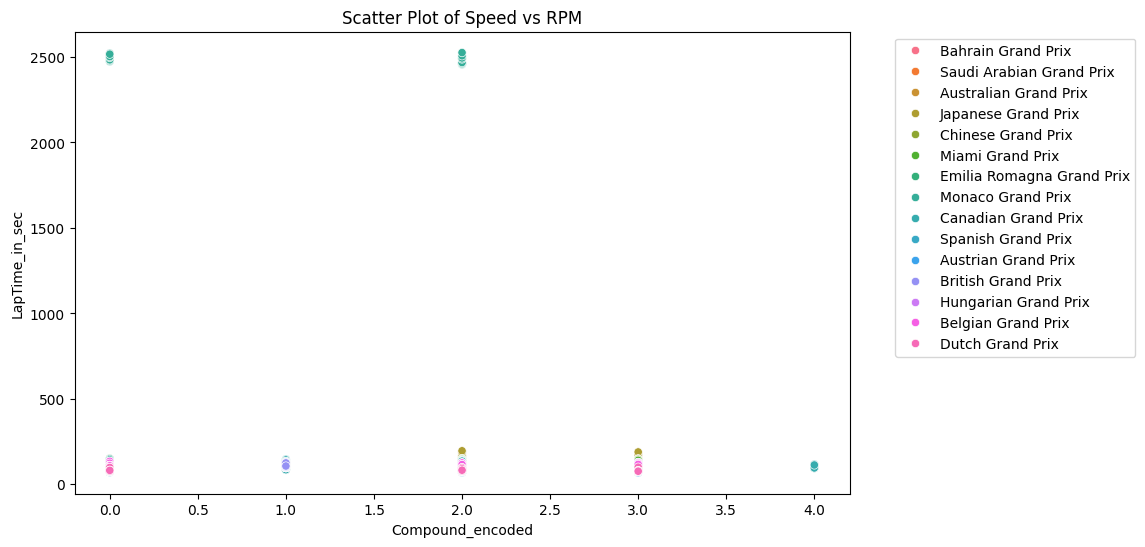

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Compound_encoded', y='LapTime_in_sec', hue='EventName')
plt.title('Scatter Plot of Speed vs RPM')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

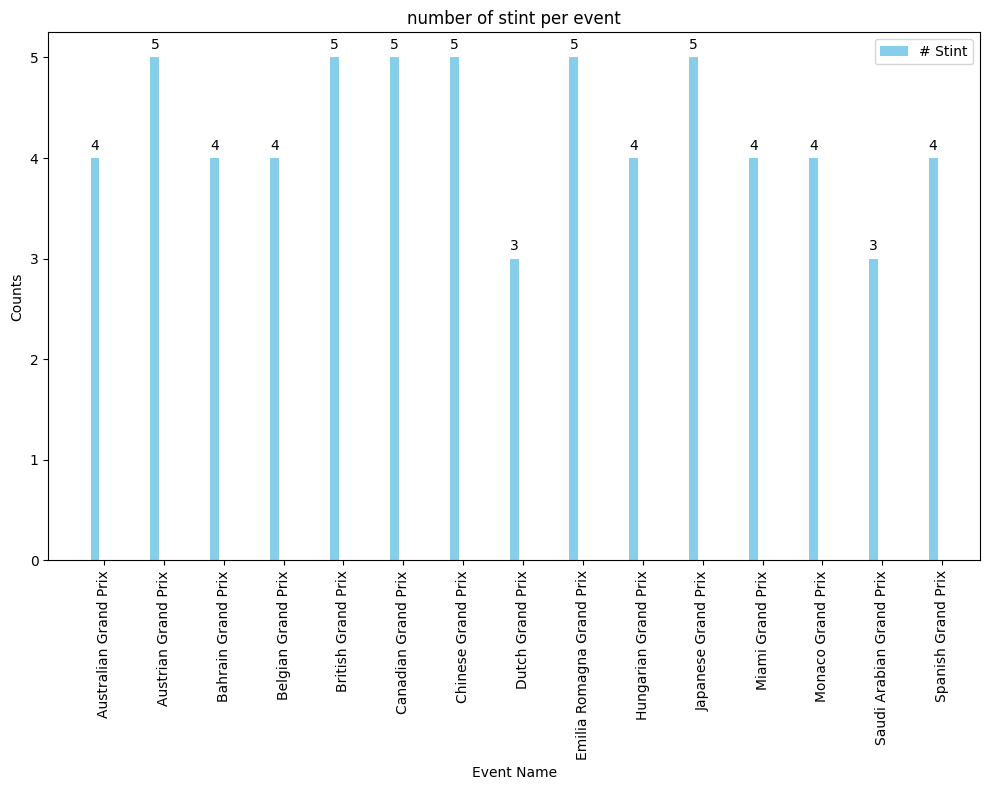

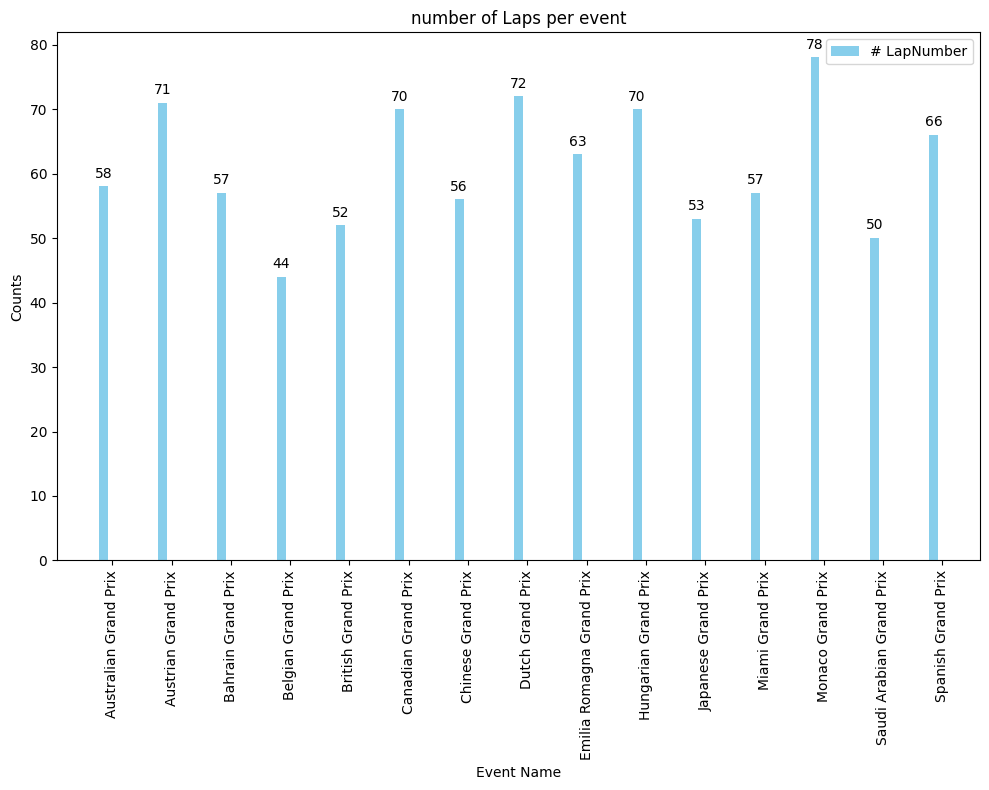

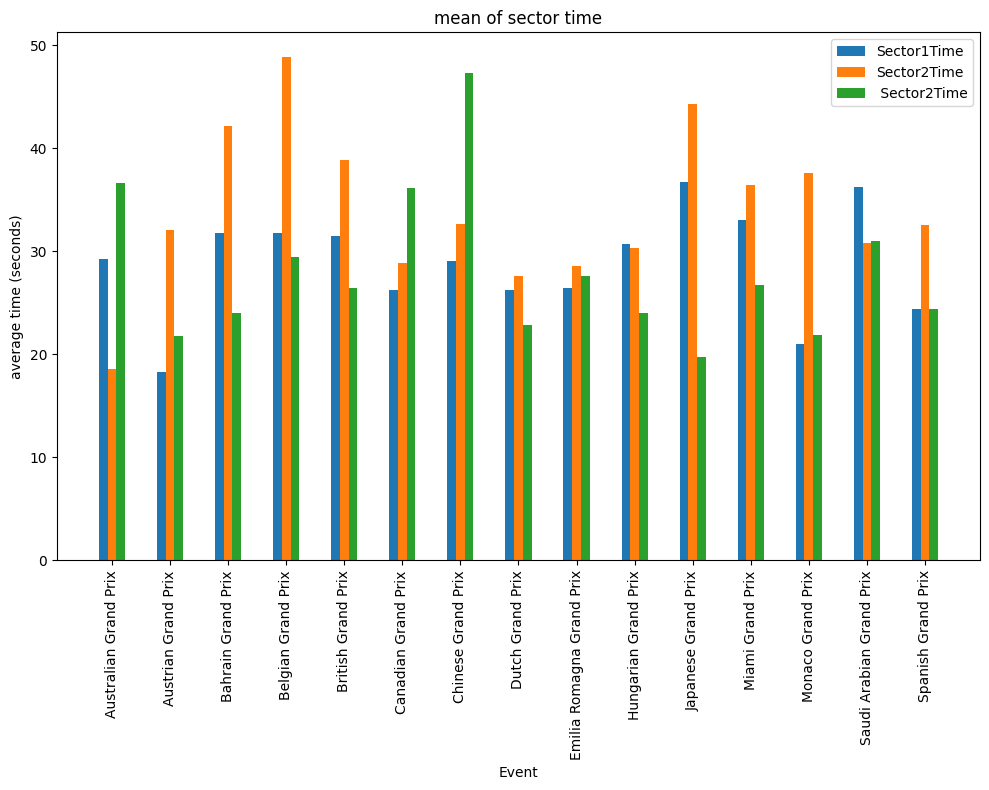

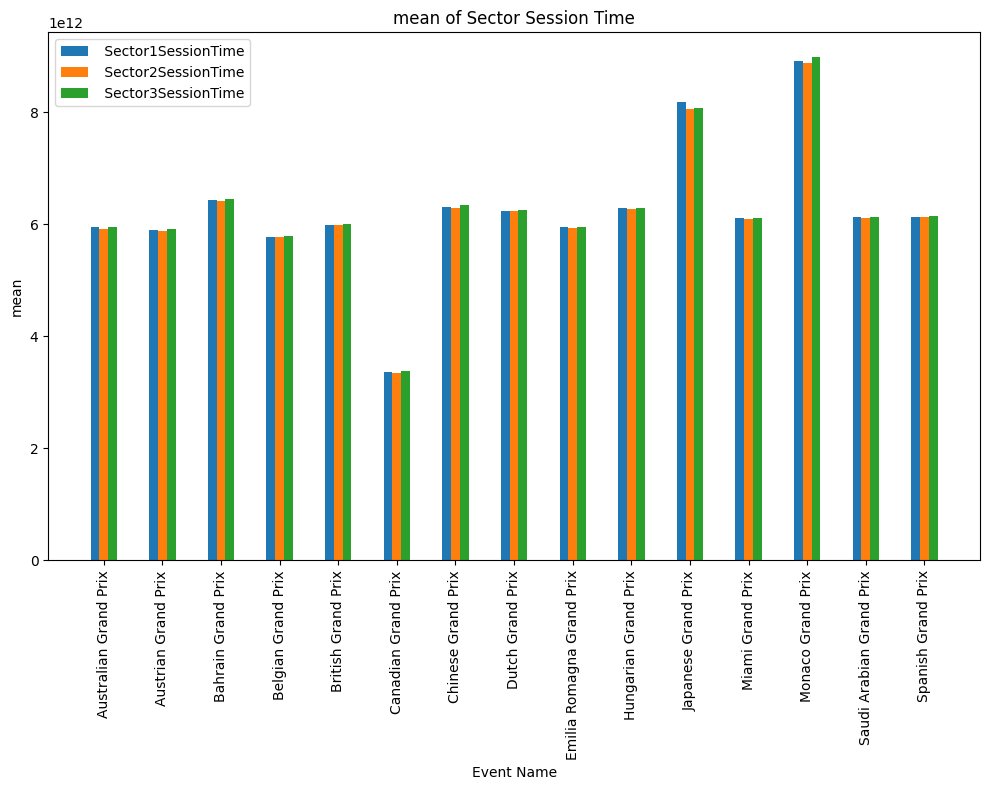

In [ ]:

grouped_data = df.groupby('EventName').agg({
            'LapNumber': lambda x: np.count_nonzero(np.unique(x)),
            'Stint': lambda x: np.count_nonzero(np.unique(x)),
            'LapTime': 'mean',
            'Sector1Time_in_sec': 'mean',
            'Sector2Time_in_sec': 'mean',
            'Sector3Time_in_sec': 'mean',
            'Sector1SessionTime': 'mean',
            'Sector2SessionTime': 'mean',
            'Sector3SessionTime': 'mean',

        }, dropna=False).reset_index()

# stint
categories = grouped_data['EventName']
n = len(categories)
bar_width = 0.15
index = np.arange(n)
plt.figure(figsize=(10, 8))
rect = plt.bar(index, grouped_data['Stint'], bar_width, label='# Stint', color='skyblue')
plt.bar_label(rect, padding=4)
plt.xlabel('Event Name')
plt.ylabel('Counts')
plt.title('number of stint per event')
plt.xticks(index + bar_width, categories, rotation=90)
plt.legend()

plt.tight_layout()
plt.show()

# LapNumber
categories = grouped_data['EventName']
n = len(categories)

bar_width = 0.15
index = np.arange(n)
plt.figure(figsize=(10, 8))
rect = plt.bar(index, grouped_data['LapNumber'], bar_width, label='# LapNumber', color='skyblue')
plt.bar_label(rect, padding=4)

plt.xlabel('Event Name')
plt.ylabel('Counts')
plt.title('number of Laps per event')
plt.xticks(index + bar_width, categories, rotation=90)
plt.legend()

plt.tight_layout()
plt.show()

# Sector1Time
categories = grouped_data['EventName']
n = len(categories)

bar_width = 0.15
index = np.arange(n)
plt.figure(figsize=(10, 8))
plt.bar(index, grouped_data['Sector1Time_in_sec'], bar_width, label='Sector1Time')
plt.bar(index + bar_width, grouped_data['Sector2Time_in_sec'], bar_width, label='Sector2Time')
plt.bar(index + 2*bar_width, grouped_data['Sector3Time_in_sec'], bar_width, label=' Sector2Time')

plt.xlabel('Event')
plt.ylabel('average time (seconds)')
plt.title('mean of sector time')
plt.xticks(index + bar_width, categories, rotation=90)
plt.legend()

plt.tight_layout()
plt.show()

# Sector1SessionTime

index = np.arange(n)
plt.figure(figsize=(10, 8))
plt.bar(index , grouped_data['Sector1SessionTime'], bar_width, label=' Sector1SessionTime')
plt.bar(index + 1*bar_width, grouped_data['Sector2SessionTime'], bar_width, label=' Sector2SessionTime')
plt.bar(index + 2*bar_width, grouped_data['Sector3SessionTime'], bar_width, label=' Sector3SessionTime')

plt.xlabel('Event Name')
plt.ylabel('mean')
plt.title('mean of Sector Session Time')
plt.xticks(index + bar_width, categories, rotation=90)
plt.legend()

plt.tight_layout()
plt.show()

#### driver based

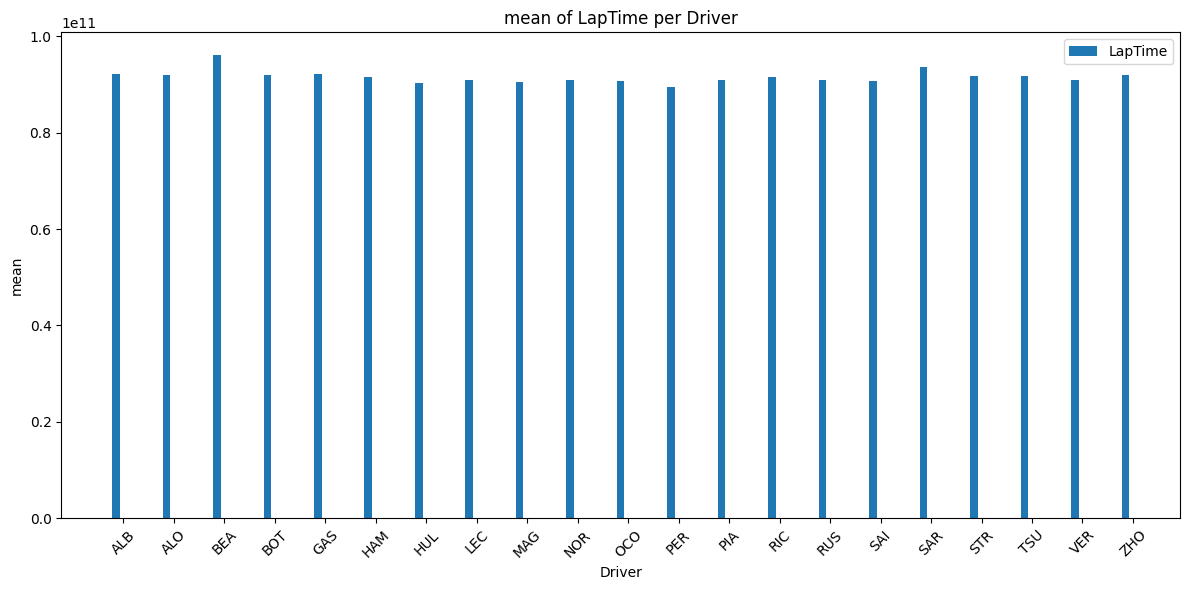

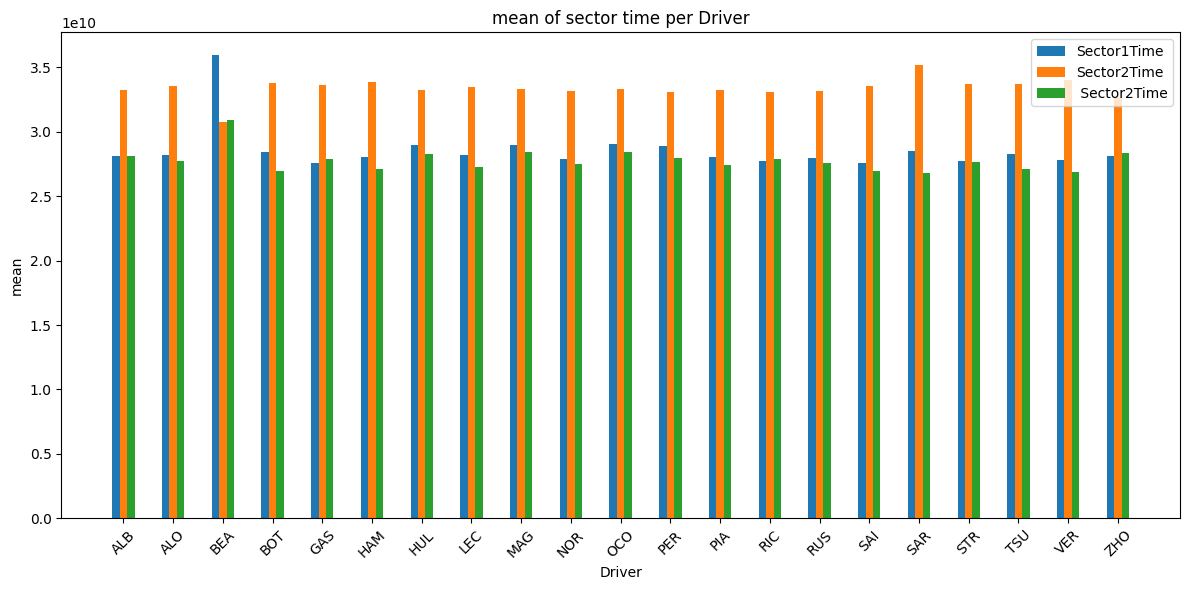

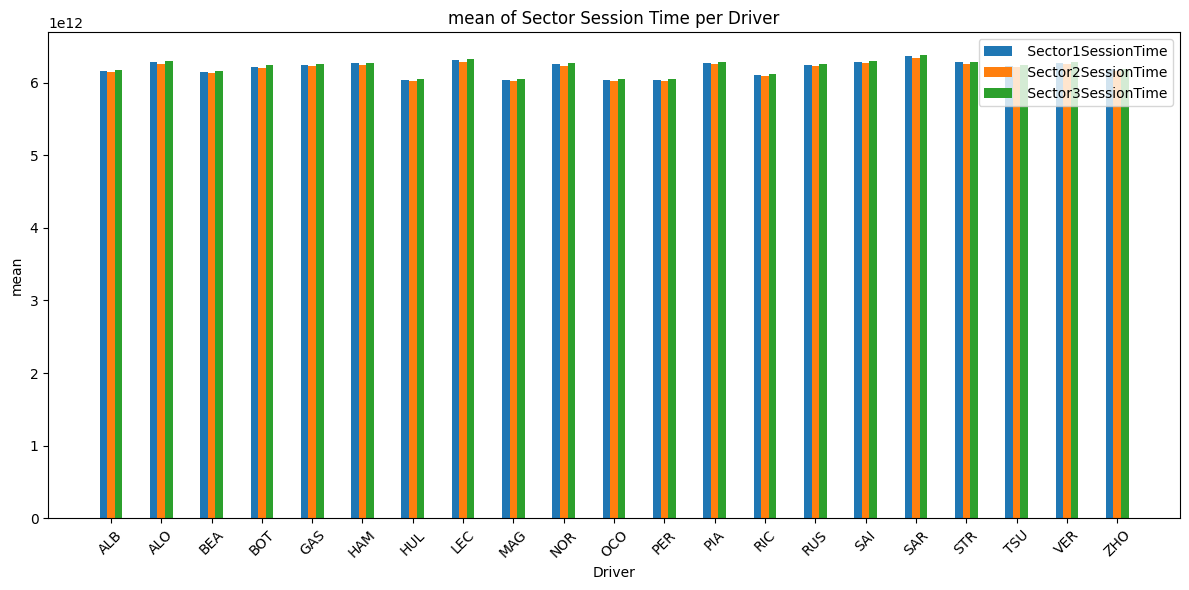

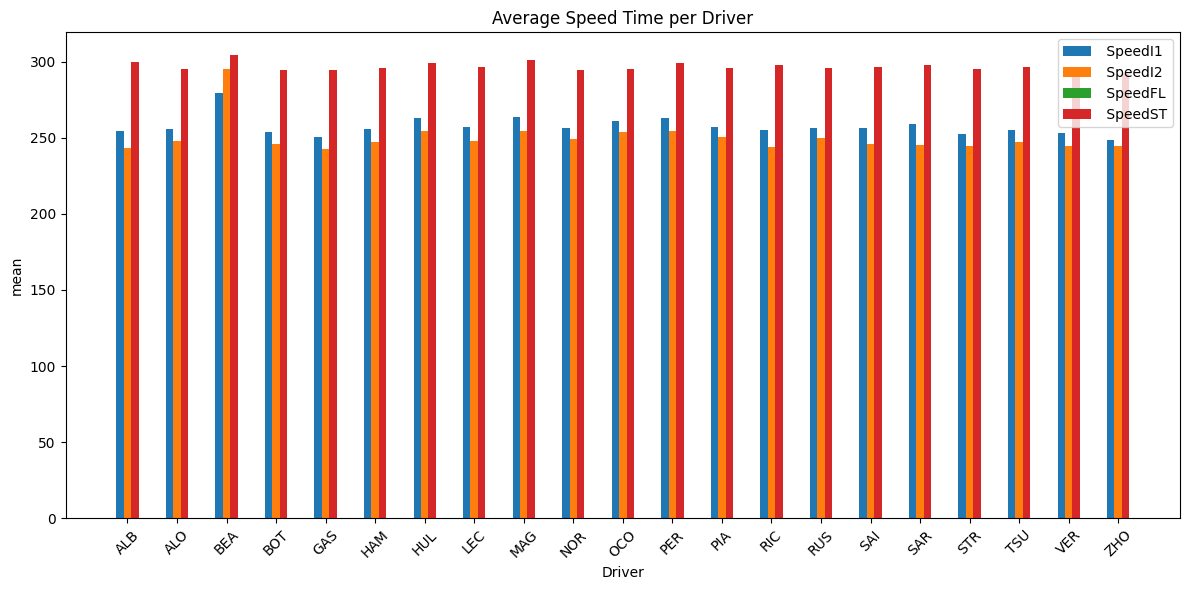

In [ ]:
# --------------------------------------------------------Delta Time -------------------------------
grouped_data = df.groupby('Driver').agg({
            'LapTime': 'mean',
            'Sector1Time': 'mean',
            'Sector2Time': 'mean',
            'Sector3Time': 'mean',
            'Sector1SessionTime': 'mean',
            'Sector2SessionTime': 'mean',
            'Sector3SessionTime': 'mean',
            'SpeedI1'	: 'mean',
            'SpeedI2'	: 'mean',
            'SpeedFL'	: 'mean',
            'SpeedST': 'mean'
        }, dropna=False).reset_index()
# ---------------------------------LapTime--------------------------------------
categories = grouped_data['Driver']
n = len(categories)

bar_width = 0.15
index = np.arange(n)
plt.figure(figsize=(12, 6))
plt.bar(index, grouped_data['LapTime'], bar_width, label='LapTime')

plt.xlabel('Driver')
plt.ylabel('mean')
plt.title('mean of LapTime per Driver')
plt.xticks(index + bar_width, categories, rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

#------------------------------- Sector1Time------------------------------------
categories = grouped_data['Driver']
n = len(categories)

bar_width = 0.15
index = np.arange(n)
plt.figure(figsize=(12, 6))
plt.bar(index, grouped_data['Sector1Time'], bar_width, label='Sector1Time')
plt.bar(index + bar_width, grouped_data['Sector2Time'], bar_width, label='Sector2Time')
plt.bar(index + 2*bar_width, grouped_data['Sector3Time'], bar_width, label=' Sector2Time')

plt.xlabel('Driver')
plt.ylabel('mean')
plt.title('mean of sector time per Driver')
plt.xticks(index + bar_width, categories, rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

# Sector1SessionTime

index = np.arange(n)
plt.figure(figsize=(12, 6))
plt.bar(index , grouped_data['Sector1SessionTime'], bar_width, label=' Sector1SessionTime')
plt.bar(index + 1*bar_width, grouped_data['Sector2SessionTime'], bar_width, label=' Sector2SessionTime')
plt.bar(index + 2*bar_width, grouped_data['Sector3SessionTime'], bar_width, label=' Sector3SessionTime')

plt.xlabel('Driver')
plt.ylabel('mean')
plt.title('mean of Sector Session Time per Driver')
plt.xticks(index + bar_width, categories, rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

# ----------------------------speed time----------------------------------------

index = np.arange(n)
plt.figure(figsize=(12, 6))
plt.bar(index , grouped_data['SpeedI1'], bar_width, label=' SpeedI1')
plt.bar(index + 1*bar_width, grouped_data['SpeedI2'], bar_width, label=' SpeedI2')
plt.bar(index + 2*bar_width, grouped_data['SpeedFL'], bar_width, label=' SpeedFL')
plt.bar(index + 2*bar_width, grouped_data['SpeedST'], bar_width, label=' SpeedST')

plt.xlabel('Driver')
plt.ylabel('mean')
plt.title('Average Speed Time per Driver')
plt.xticks(index + bar_width, categories, rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

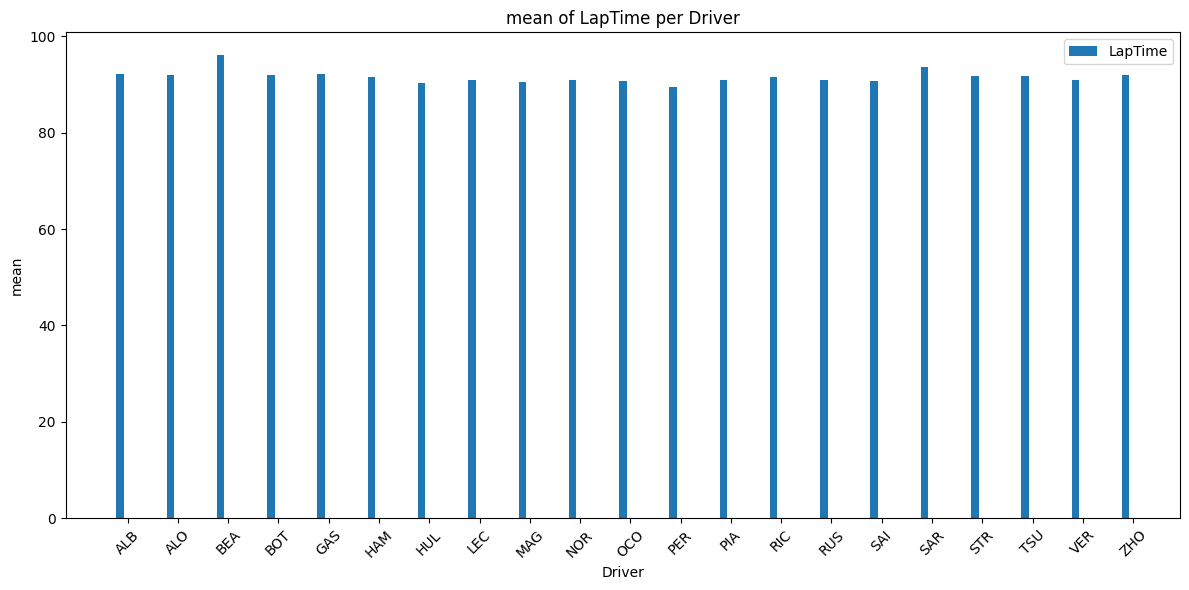

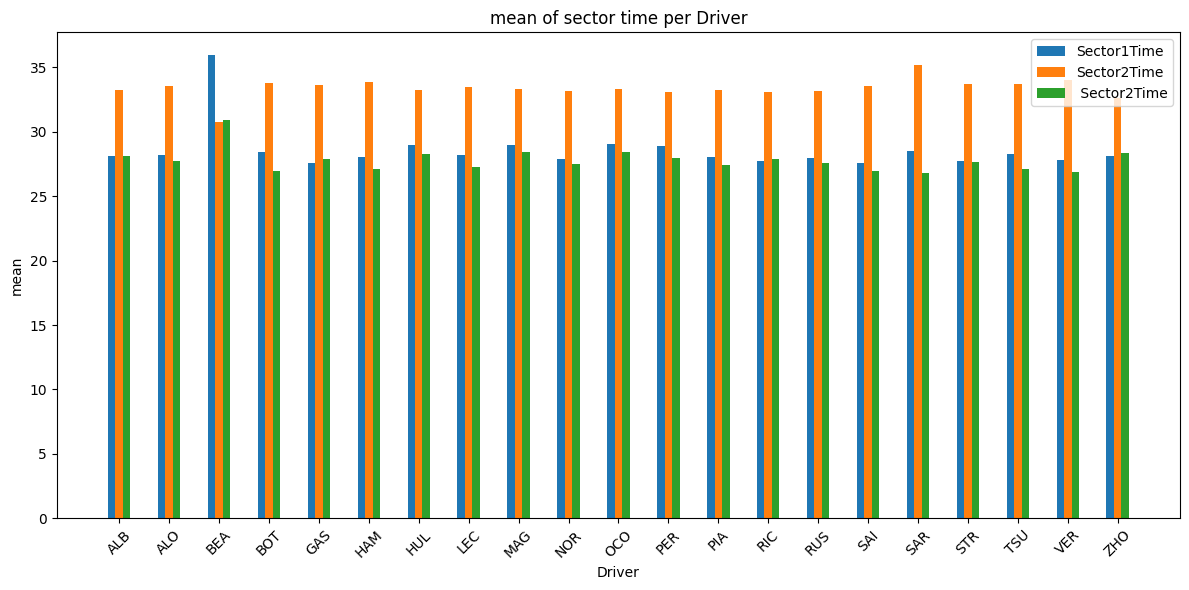

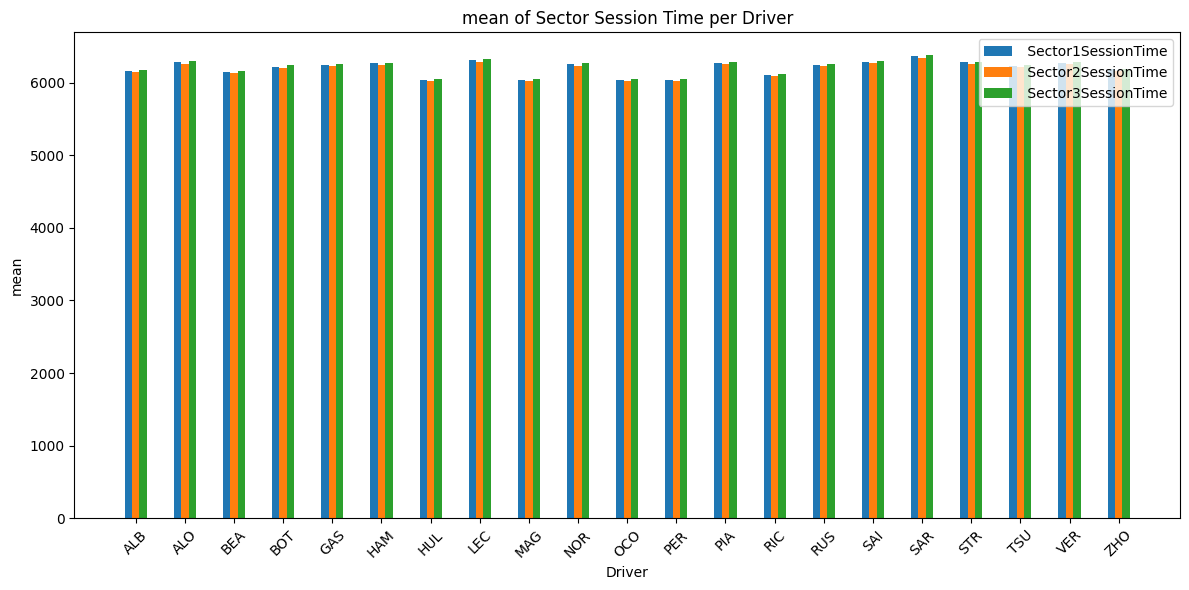

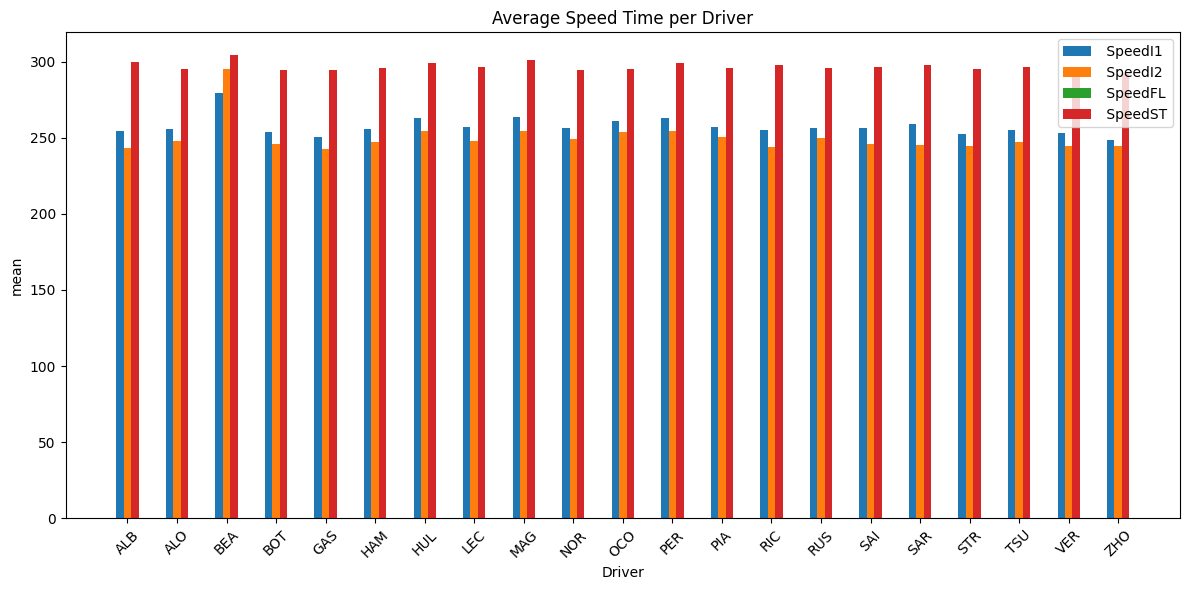

In [ ]:
# ----------------------------------------- Seconds    ------------------------------
grouped_data = df.groupby('Driver').agg({
            'LapTime_in_sec': 'mean',
            'Sector1Time_in_sec': 'mean',
            'Sector2Time_in_sec': 'mean',
            'Sector3Time_in_sec': 'mean',
            'Sector1SessionTime_in_sec': 'mean',
            'Sector2SessionTime_in_sec': 'mean',
            'Sector3SessionTime_in_sec': 'mean',
            'SpeedI1'	: 'mean',
            'SpeedI2'	: 'mean',
            'SpeedFL'	: 'mean',
            'SpeedST': 'mean'
        }, dropna=False).reset_index()
# ---------------------------------LapTime--------------------------------------
categories = grouped_data['Driver']
n = len(categories)

bar_width = 0.15
index = np.arange(n)
plt.figure(figsize=(12, 6))
plt.bar(index, grouped_data['LapTime_in_sec'], bar_width, label='LapTime')

plt.xlabel('Driver')
plt.ylabel('mean')
plt.title('mean of LapTime per Driver')
plt.xticks(index + bar_width, categories, rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

#------------------------------- Sector1Time------------------------------------
categories = grouped_data['Driver']
n = len(categories)

bar_width = 0.15
index = np.arange(n)
plt.figure(figsize=(12, 6))
plt.bar(index, grouped_data['Sector1Time_in_sec'], bar_width, label='Sector1Time')
plt.bar(index + bar_width, grouped_data['Sector2Time_in_sec'], bar_width, label='Sector2Time')
plt.bar(index + 2*bar_width, grouped_data['Sector3Time_in_sec'], bar_width, label=' Sector2Time')

plt.xlabel('Driver')
plt.ylabel('mean')
plt.title('mean of sector time per Driver')
plt.xticks(index + bar_width, categories, rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

# Sector1SessionTime

index = np.arange(n)
plt.figure(figsize=(12, 6))
plt.bar(index , grouped_data['Sector1SessionTime_in_sec'], bar_width, label=' Sector1SessionTime')
plt.bar(index + 1*bar_width, grouped_data['Sector2SessionTime_in_sec'], bar_width, label=' Sector2SessionTime')
plt.bar(index + 2*bar_width, grouped_data['Sector3SessionTime_in_sec'], bar_width, label=' Sector3SessionTime')

plt.xlabel('Driver')
plt.ylabel('mean')
plt.title('mean of Sector Session Time per Driver')
plt.xticks(index + bar_width, categories, rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

# ----------------------------speed time----------------------------------------

index = np.arange(n)
plt.figure(figsize=(12, 6))
plt.bar(index , grouped_data['SpeedI1'], bar_width, label=' SpeedI1')
plt.bar(index + 1*bar_width, grouped_data['SpeedI2'], bar_width, label=' SpeedI2')
plt.bar(index + 2*bar_width, grouped_data['SpeedFL'], bar_width, label=' SpeedFL')
plt.bar(index + 2*bar_width, grouped_data['SpeedST'], bar_width, label=' SpeedST')

plt.xlabel('Driver')
plt.ylabel('mean')
plt.title('Average Speed Time per Driver')
plt.xticks(index + bar_width, categories, rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

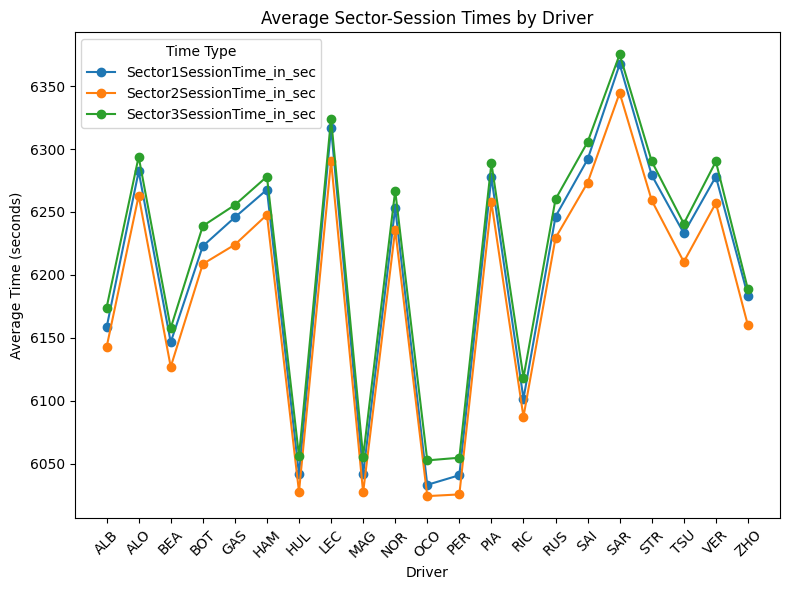

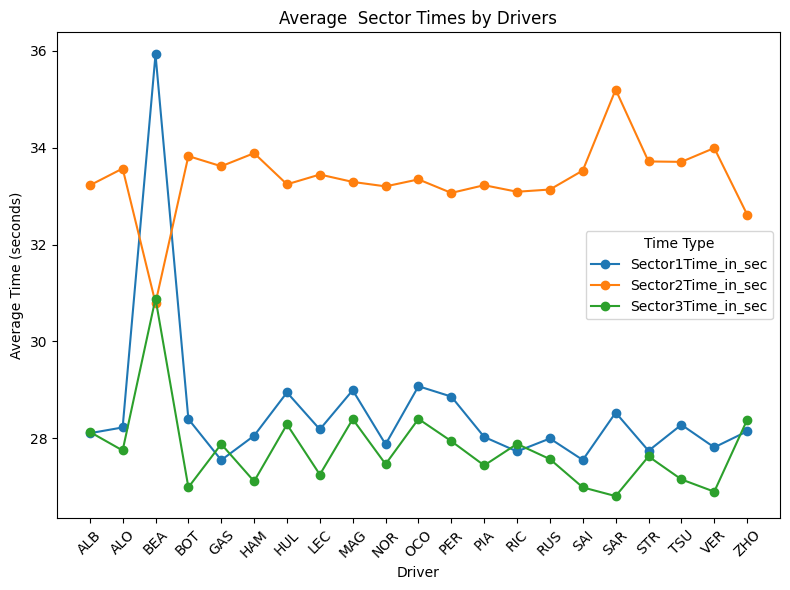

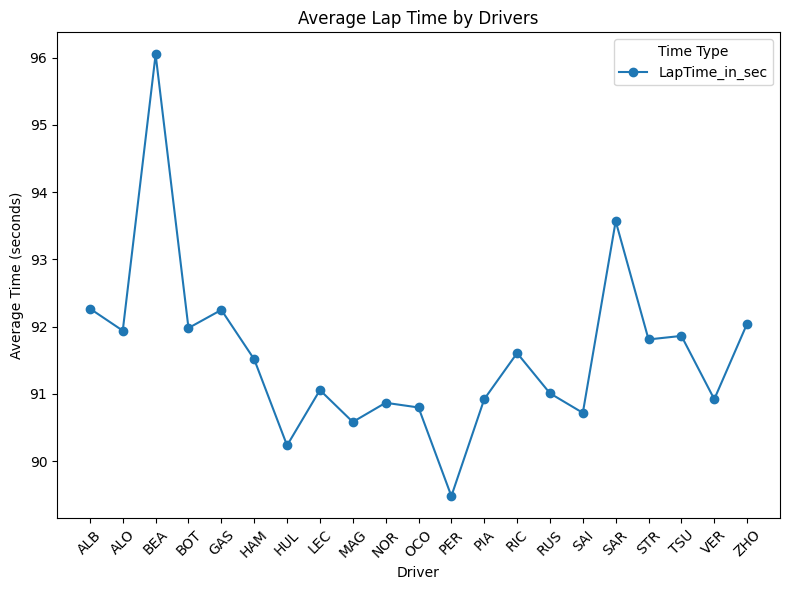

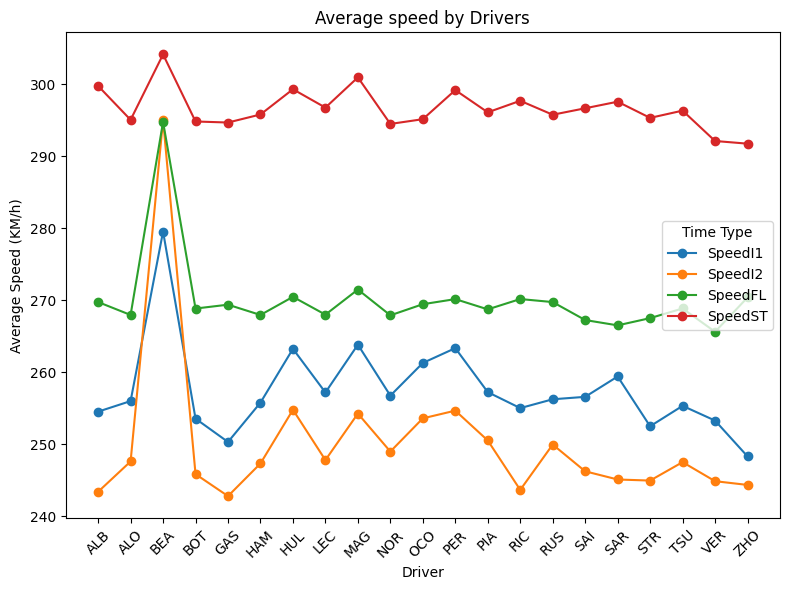

In [ ]:
# ---------------------------------------------------------Delta Time ----------------------------
grouped_data = df.groupby('Driver').agg({
            'LapTime_in_sec': 'mean',
            'Sector1Time_in_sec': 'mean',
            'Sector2Time_in_sec': 'mean',
            'Sector3Time_in_sec': 'mean',
            'Sector1SessionTime_in_sec': 'mean',
            'Sector2SessionTime_in_sec': 'mean',
            'Sector3SessionTime_in_sec': 'mean',
            'SpeedI1'	: 'mean',
            'SpeedI2'	: 'mean',
            'SpeedFL'	: 'mean',
            'SpeedST': 'mean'
        }, dropna=False).reset_index()

# -------------------------------SectorSessionTime--------------------------------------
plt.figure(figsize=(8, 6))
for column in [ 'Sector1SessionTime_in_sec', 'Sector2SessionTime_in_sec', 'Sector3SessionTime_in_sec']:
    plt.plot(grouped_data['Driver'], grouped_data[column], marker='o', label=column)
plt.xlabel('Driver')
plt.ylabel('Average Time (seconds)')
plt.title('Average Sector-Session Times by Driver')
plt.xticks(rotation=45)
plt.legend(title='Time Type')
plt.tight_layout()
plt.show()
# ----------------------------------Sector1Time---------------------------------
plt.figure(figsize=(8, 6))
for column in [ 'Sector1Time_in_sec', 'Sector2Time_in_sec', 'Sector3Time_in_sec']:
    plt.plot(grouped_data['Driver'], grouped_data[column], marker='o', label=column)
plt.xlabel('Driver')
plt.ylabel('Average Time (seconds)')
plt.title('Average  Sector Times by Drivers')
plt.xticks(rotation=45)
plt.legend(title='Time Type')
plt.tight_layout()
plt.show()
# ----------------------------------lapTime---------------------------------

plt.figure(figsize=(8, 6))
for column in [ 'LapTime_in_sec']:
    plt.plot(grouped_data['Driver'], grouped_data[column], marker='o', label=column)
plt.xlabel('Driver')
plt.ylabel('Average Time (seconds)')
plt.title('Average Lap Time by Drivers')
plt.xticks(rotation=45)
plt.legend(title='Time Type')
plt.tight_layout()
plt.show()

# -----------------------------------SpeedI1------------------------------------
plt.figure(figsize=(8, 6))
for column in ['SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST']:
    plt.plot(grouped_data['Driver'], grouped_data[column], marker='o', label=column)
plt.xlabel('Driver')
plt.ylabel('Average Speed (KM/h)')
plt.title('Average speed by Drivers')
plt.xticks(rotation=45)
plt.legend(title='Time Type')
plt.tight_layout()
plt.show()

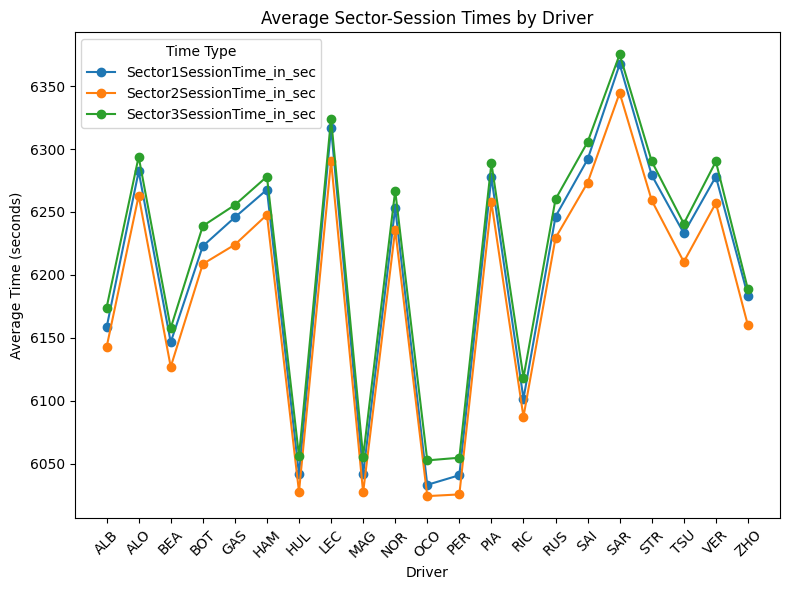

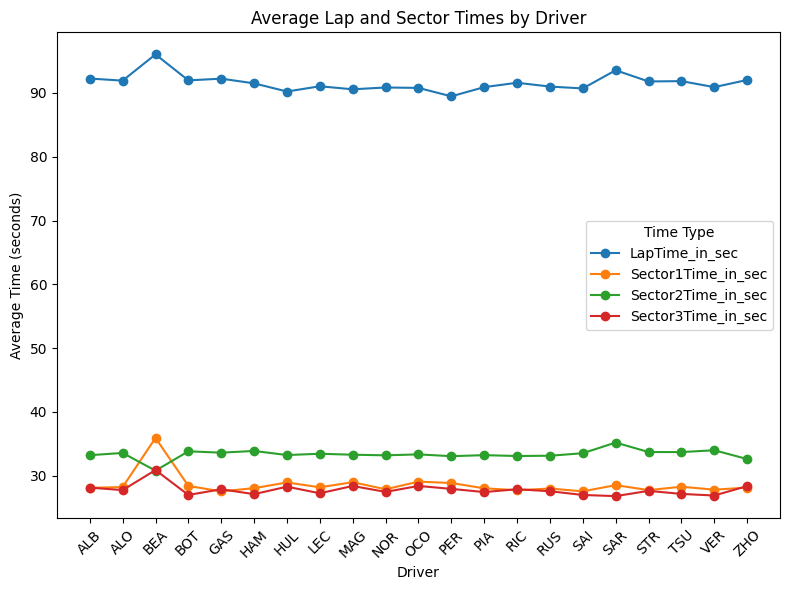

In [ ]:
# ----------------------------------------- Seconds    ------------------------------
grouped_data = df.groupby('Driver').agg({
            'LapTime_in_sec': 'mean',
            'Sector1Time_in_sec': 'mean',
            'Sector2Time_in_sec': 'mean',
            'Sector3Time_in_sec': 'mean',
            'Sector1SessionTime_in_sec': 'mean',
            'Sector2SessionTime_in_sec': 'mean',
            'Sector3SessionTime_in_sec': 'mean',
            'SpeedI1'	: 'mean',
            'SpeedI2'	: 'mean',
            'SpeedFL'	: 'mean',
            'SpeedST': 'mean'
        }, dropna=False).reset_index()
# -------------------------------SectorSessionTime--------------------------------------
plt.figure(figsize=(8, 6))
for column in [ 'Sector1SessionTime_in_sec', 'Sector2SessionTime_in_sec', 'Sector3SessionTime_in_sec']:
    plt.plot(grouped_data['Driver'], grouped_data[column], marker='o', label=column)
plt.xlabel('Driver')
plt.ylabel('Average Time (seconds)')
plt.title('Average Sector-Session Times by Driver')
plt.xticks(rotation=45)
plt.legend(title='Time Type')
plt.tight_layout()
plt.show()
# ----------------------------------Sector1Time---------------------------------
plt.figure(figsize=(8, 6))
for column in ['LapTime_in_sec', 'Sector1Time_in_sec', 'Sector2Time_in_sec', 'Sector3Time_in_sec']:
    plt.plot(grouped_data['Driver'], grouped_data[column], marker='o', label=column)
plt.xlabel('Driver')
plt.ylabel('Average Time (seconds)')
plt.title('Average Lap and Sector Times by Driver')
plt.xticks(rotation=45)
plt.legend(title='Time Type')
plt.tight_layout()
plt.show()


##### best lap number for each driver

In [ ]:
personal_bests = df[df['IsPersonalBest'] == True]

driver_based_min  = personal_bests.groupby('Driver')['LapNumber'].min().reset_index()
driver_based_min.columns = ['Driver', 'PersonalBestLapNumberMin']

driver_based_median  = personal_bests.groupby('Driver')['LapNumber'].median().reset_index()
driver_based_median.columns = ['Driver', 'PersonalBestLapNumberMedian']

driver_based_max  = personal_bests.groupby('Driver')['LapNumber'].max().reset_index()
driver_based_max.columns = ['Driver', 'PersonalBestLapNumberMax']

merged_df = pd.merge(driver_based_median, driver_based_min, on='Driver', how='left')
merged_df = pd.merge(merged_df, driver_based_max, on='Driver', how='left')
merged_df

,Driver,PersonalBestLapNumberMedian,PersonalBestLapNumberMin,PersonalBestLapNumberMax
0,ALB,15.0,2.0,77.0
1,ALO,26.5,2.0,70.0
2,BEA,27.0,2.0,50.0
3,BOT,13.0,2.0,65.0
4,GAS,17.5,2.0,77.0
5,HAM,21.5,2.0,70.0
6,HUL,26.5,2.0,67.0
7,LEC,23.5,2.0,71.0
8,MAG,19.5,2.0,68.0
9,NOR,24.0,2.0,72.0


In [ ]:
personal_bests = df[df['IsPersonalBest'] == True]

event_based_min  = personal_bests.groupby('EventName')['LapNumber'].min().reset_index()
event_based_min.columns = ['EventName', 'PersonalBestLapNumberMin']

event_based_median  = personal_bests.groupby('EventName')['LapNumber'].median().reset_index()
event_based_median.columns = ['EventName', 'PersonalBestLapNumberMedian']

event_based_max  = personal_bests.groupby('EventName')['LapNumber'].max().reset_index()
event_based_max.columns = ['EventName', 'PersonalBestLapNumberMax']

merged_df = pd.merge(event_based_median, event_based_min, on='EventName', how='left')
merged_df = pd.merge(merged_df, event_based_max, on='EventName', how='left')
merged_df

for column in ['PersonalBestLapNumber']:
    plt.plot(event_based_min['Driver'], event_based_min[column], marker='o', label=column)
plt.xlabel('Driver')
plt.ylabel('best lap number ')
plt.title('Average best lap Number per driver')
plt.xticks(rotation=45)
plt.legend(title='Time Type')
plt.tight_layout()
plt.show()

,EventName,PersonalBestLapNumberMedian,PersonalBestLapNumberMin,PersonalBestLapNumberMax
0,Australian Grand Prix,22.0,2.0,56.0
1,Austrian Grand Prix,25.5,2.0,70.0
2,Bahrain Grand Prix,17.0,2.0,48.0
3,Belgian Grand Prix,18.0,2.0,44.0
4,British Grand Prix,15.0,2.0,52.0
5,Canadian Grand Prix,19.0,2.0,70.0
6,Chinese Grand Prix,11.0,2.0,45.0
7,Dutch Grand Prix,25.0,2.0,72.0
8,Emilia Romagna Grand Prix,10.0,2.0,63.0
9,Hungarian Grand Prix,18.0,2.0,66.0


In [ ]:
event_based_groups = personal_bests.groupby(['EventName', 'LapNumber'])['Driver'].apply(list).reset_index()
event_based_groups.columns = ['EventName', 'LapNumber', 'Drivers']
event_based_groups

,EventName,LapNumber,Drivers
0,Australian Grand Prix,2.0,"[VER, GAS, PER, ALO, LEC, STR, MAG, TSU, ALB, ..."
1,Australian Grand Prix,3.0,"[VER, GAS, PER, ALO, LEC, STR, MAG, TSU, ALB, ..."
2,Australian Grand Prix,4.0,"[GAS, LEC, MAG, ALB, OCO, NOR, SAI, PIA]"
3,Australian Grand Prix,6.0,"[PER, STR, BOT]"
4,Australian Grand Prix,7.0,"[GAS, PER, ALO, STR, TSU, OCO, RUS]"
...,...,...,...
661,Spanish Grand Prix,54.0,"[VER, OCO]"
662,Spanish Grand Prix,55.0,"[PIA, TSU]"
663,Spanish Grand Prix,56.0,"[PIA, TSU]"
664,Spanish Grand Prix,60.0,[RIC]


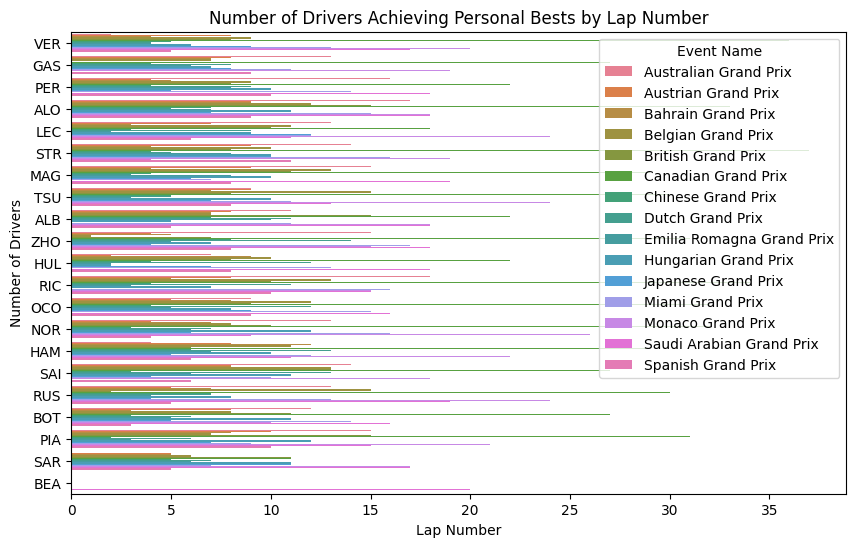

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=event_based_groups.explode('Drivers'),
             x='LapNumber',
             y='Drivers',
             hue='EventName',
             estimator=lambda x: len(x),
             ci=None)

plt.title('Number of Drivers Achieving Personal Bests by Lap Number')
plt.xlabel('Lap Number')
plt.ylabel('Number of Drivers')
plt.legend(title='Event Name')
plt.show()

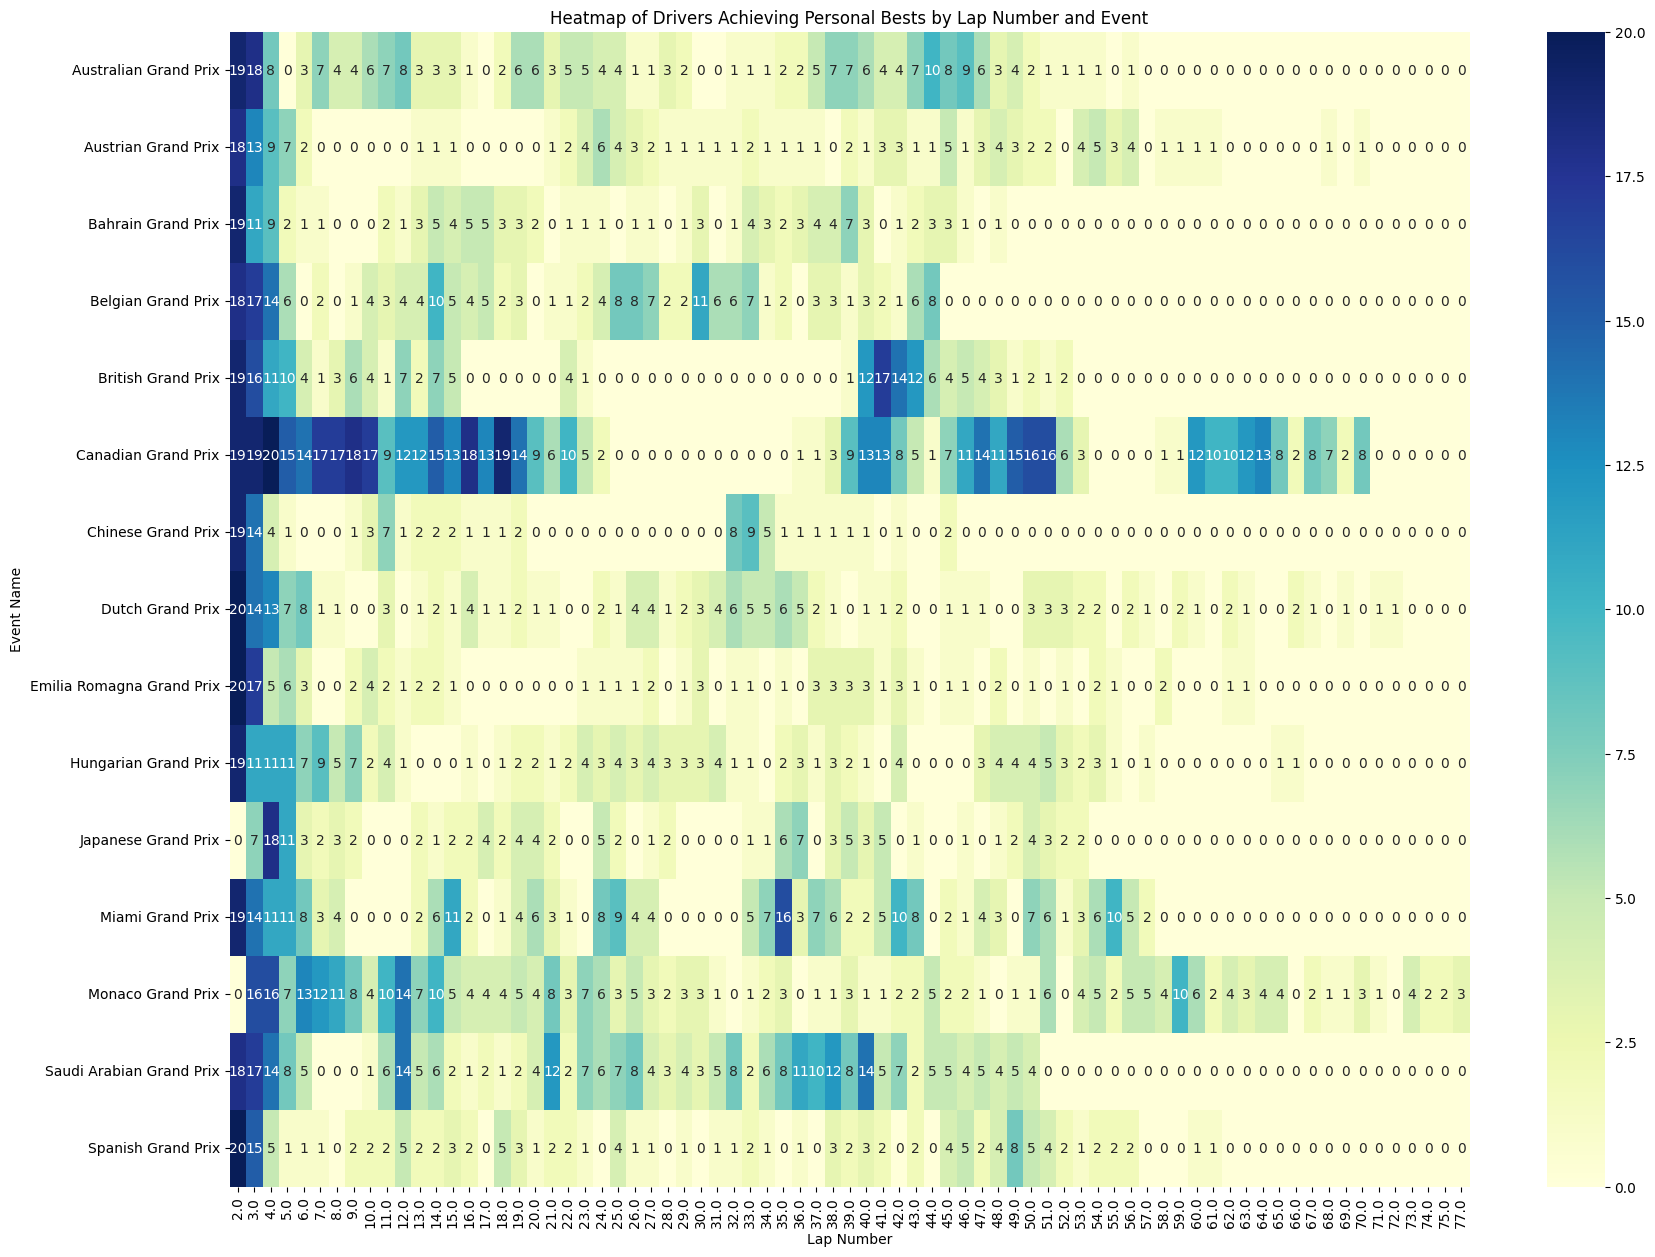

In [ ]:
# Create a pivot table for the heatmap
heatmap_data = event_based_groups.explode('Drivers').groupby(['EventName', 'LapNumber']).size().unstack(fill_value=0)

plt.figure(figsize=(20, 15))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap of Drivers Achieving Personal Bests by Lap Number and Event')
plt.xlabel('Lap Number')
plt.ylabel('Event Name')
plt.show()

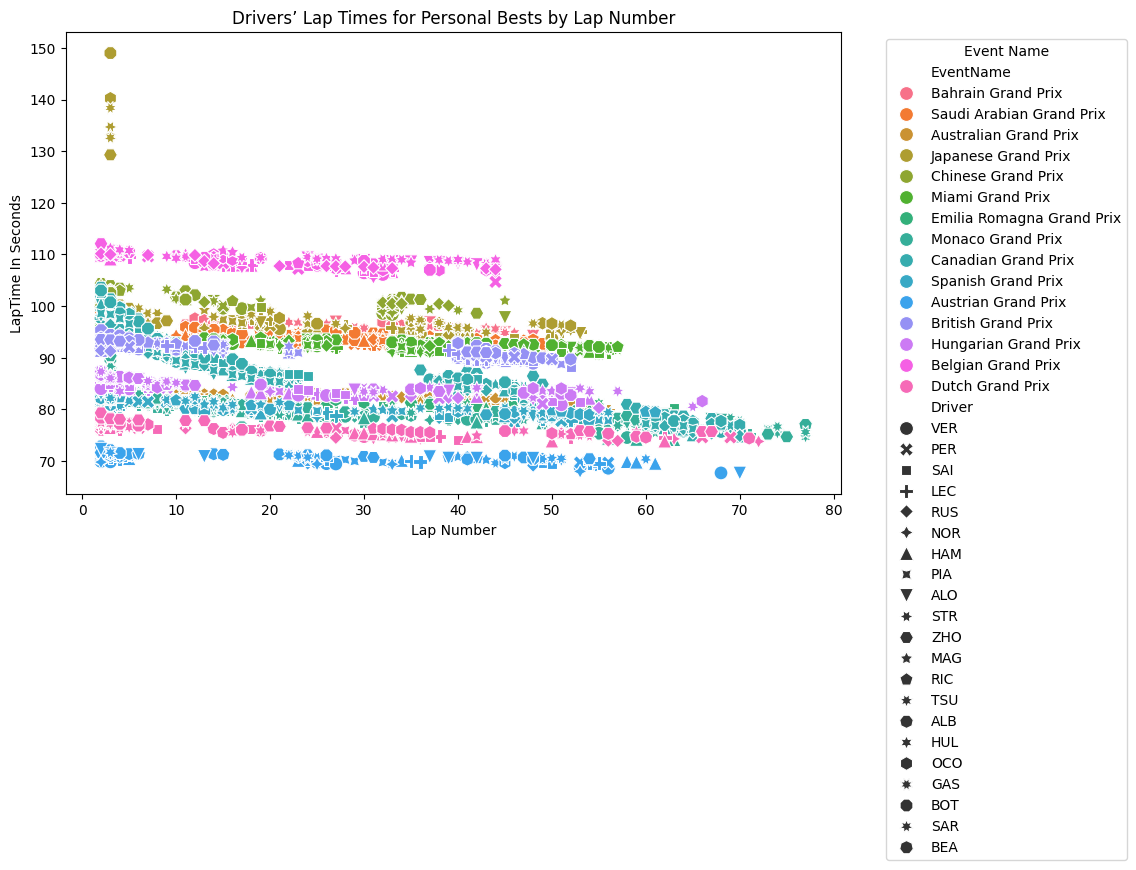

In [ ]:
personal_bests['LapTimeInSeconds'] = personal_bests['LapTime'].dt.total_seconds()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=personal_bests, x='LapNumber', y='LapTimeInSeconds', hue='EventName', style='Driver', s=100)
plt.title('Drivers’ Lap Times for Personal Bests by Lap Number')
plt.xlabel('Lap Number')
plt.ylabel('LapTime In Seconds')
plt.legend(title='Event Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

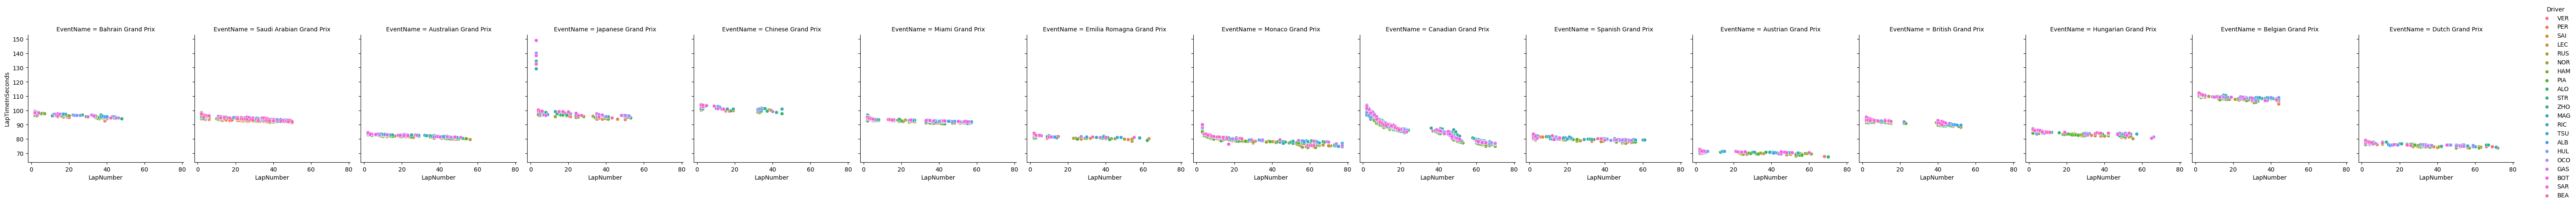

In [ ]:

personal_bests['LapTimeInSeconds'] = personal_bests['LapTime'].dt.total_seconds()

facet_grid = sns.FacetGrid(personal_bests, col='EventName', hue='Driver', height=4, aspect=1)
facet_grid.map(sns.scatterplot, 'LapNumber', 'LapTimeInSeconds')
facet_grid.add_legend()
plt.subplots_adjust(top=0.9)

plt.show()

#### lapNumber based

In [ ]:
df.dtypes

,0
EventName,object
Time,timedelta64[ns]
Driver,object
DriverNumber,int64
LapTime,timedelta64[ns]
LapNumber,float64
Stint,float64
Sector1Time,timedelta64[ns]
Sector2Time,timedelta64[ns]
Sector3Time,timedelta64[ns]


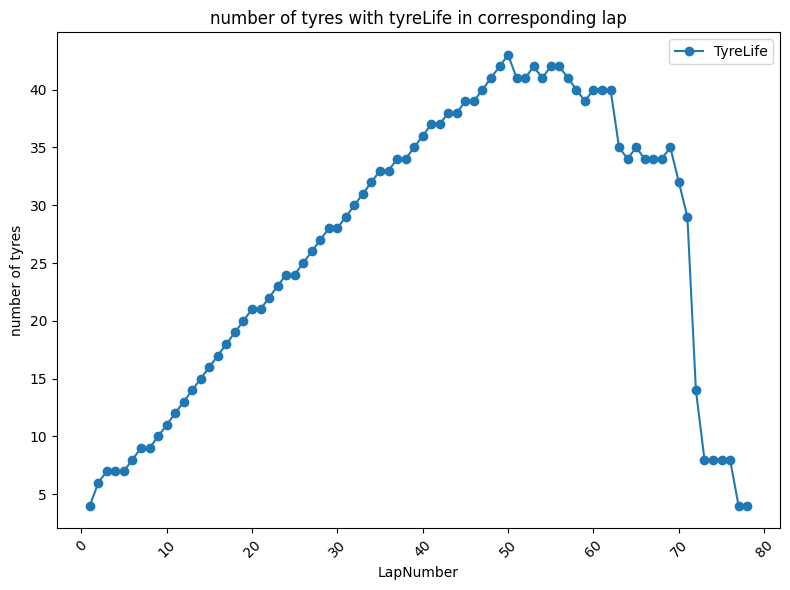

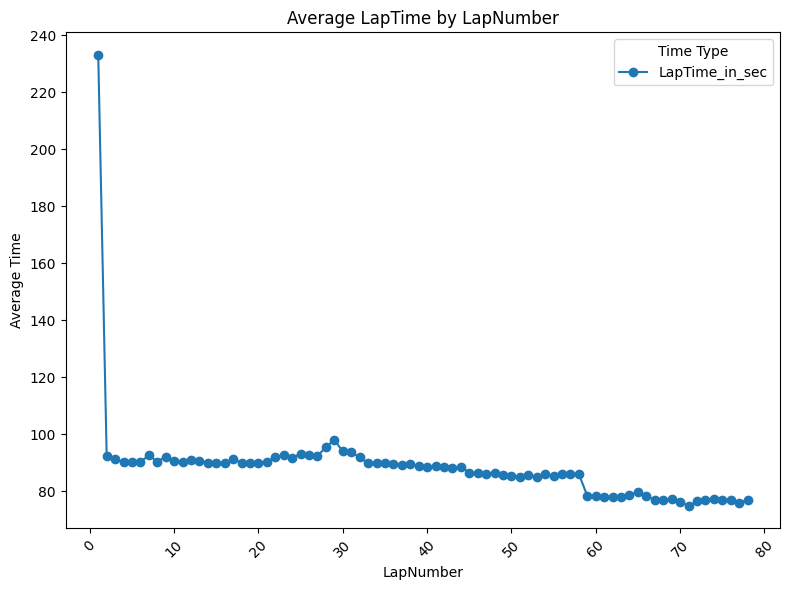

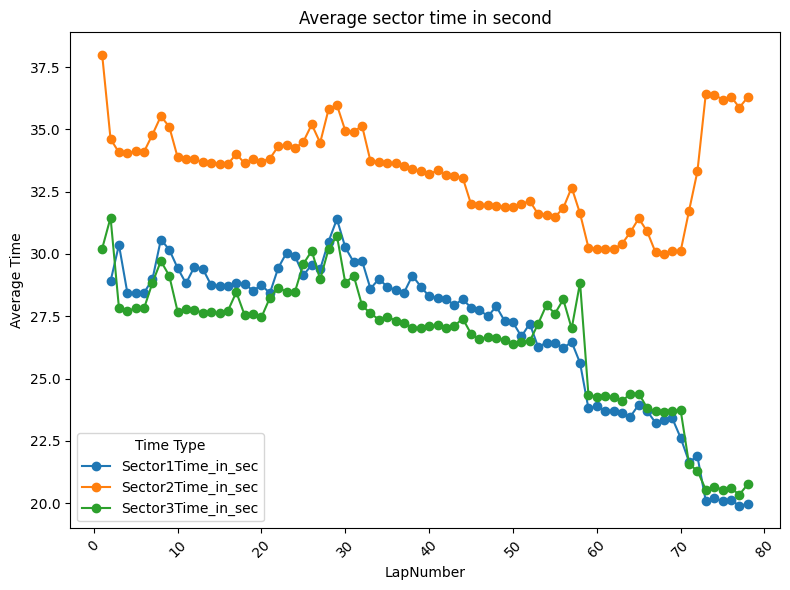

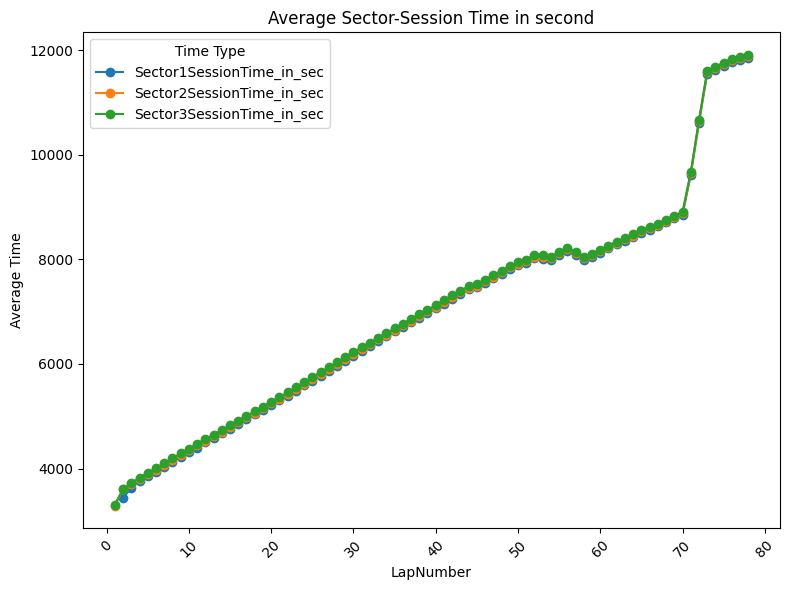

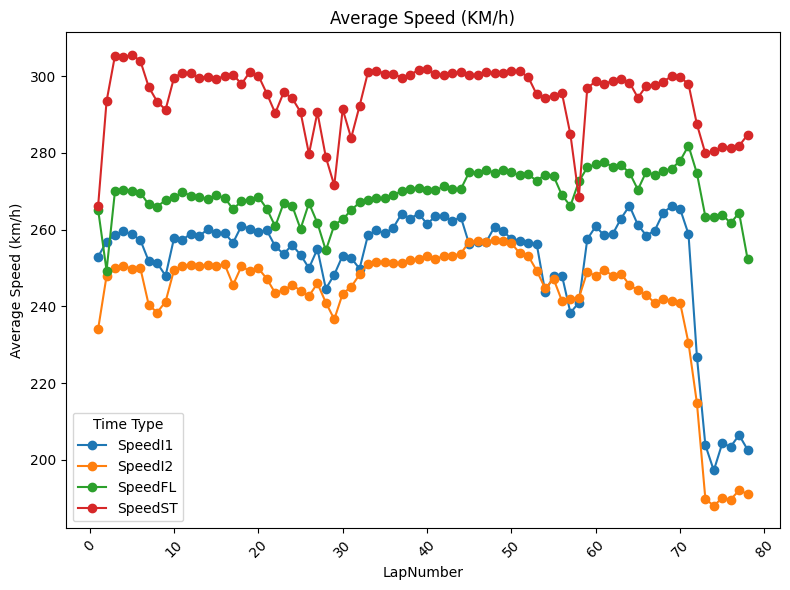

In [ ]:

grouped_data = df.groupby('LapNumber').agg({
            'Compound': list,
            # 'Driver': list,
            'LapTime_in_sec': 'mean',
            'TyreLife' :  lambda x: np.count_nonzero(np.unique(x)),
            'Sector1Time_in_sec': 'mean',
            'Sector2Time_in_sec': 'mean',
            'Sector3Time_in_sec': 'mean',
            'Sector1SessionTime_in_sec': 'mean',
            'Sector2SessionTime_in_sec': 'mean',
            'Sector3SessionTime_in_sec': 'mean',
            'SpeedI1'	: 'mean',
            'SpeedI2'	: 'mean',
            'SpeedFL'	: 'mean',
            'SpeedST': 'mean'
        }, dropna=False).reset_index()

# --------------------------------TyreLife---------------------------------

plt.figure(figsize=(8, 6))
for column in ['TyreLife']:
    plt.plot(grouped_data['LapNumber'], grouped_data[column], marker='o', label=column)
plt.xlabel('LapNumber')
plt.ylabel('number of tyres')
plt.title('number of tyres with tyreLife in corresponding lap')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
# --------------------------------lap time ---------------------------------

plt.figure(figsize=(8, 6))
for column in [ 'LapTime_in_sec']:
    plt.plot(grouped_data['LapNumber'], grouped_data[column], marker='o', label=column)
plt.xlabel('LapNumber')
plt.ylabel('Average Time')
plt.title('Average LapTime by LapNumber')
plt.xticks(rotation=45)
plt.legend(title='Time Type')
plt.tight_layout()
plt.show()
# ------------------------------sector time-----------------------------------

plt.figure(figsize=(8, 6))
for column in [ 'Sector1Time_in_sec', 'Sector2Time_in_sec', 'Sector3Time_in_sec']:
    plt.plot(grouped_data['LapNumber'], grouped_data[column], marker='o', label=column)
plt.xlabel('LapNumber')
plt.ylabel('Average Time')
plt.title('Average sector time in second')
plt.xticks(rotation=45)
plt.legend(title='Time Type')
plt.tight_layout()
plt.show()
# ------------------------------Sector Session Time-----------------------------------
plt.figure(figsize=(8, 6))
for column in [ 'Sector1SessionTime_in_sec', 'Sector2SessionTime_in_sec', 'Sector3SessionTime_in_sec']:
    plt.plot(grouped_data['LapNumber'], grouped_data[column], marker='o', label=column)
plt.xlabel('LapNumber')
plt.ylabel('Average Time')
plt.title('Average Sector-Session Time in second')
plt.xticks(rotation=45)
plt.legend(title='Time Type')
plt.tight_layout()
plt.show()
# ------------------------------Sector Session Time-----------------------------------

plt.figure(figsize=(8, 6))
for column in [ 'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST']:
    plt.plot(grouped_data['LapNumber'], grouped_data[column], marker='o', label=column)
plt.xlabel('LapNumber')
plt.ylabel('Average Speed (km/h)')
plt.title('Average Speed (KM/h)')
plt.xticks(rotation=45)
plt.legend(title='Time Type')
plt.tight_layout()
plt.show()

In [ ]:
personal_best_df = df[df['IsPersonalBest'] == True]
grouped_data = personal_best_df.groupby('LapNumber').agg({
    'Compound': list,
    'Driver': list
}).reset_index()

grouped_data[['Compound','Driver']].to_csv('compound_driver.csv', index=False)
grouped_data[['Compound','Driver']]

,Compound,Driver
0,"[SOFT, SOFT, SOFT, SOFT, SOFT, SOFT, SOFT, SOF...","[VER, PER, SAI, LEC, RUS, NOR, HAM, PIA, ALO, ..."
1,"[SOFT, SOFT, SOFT, SOFT, SOFT, SOFT, SOFT, SOF...","[SAI, RUS, PIA, ZHO, MAG, RIC, TSU, ALB, HUL, ..."
2,"[SOFT, SOFT, SOFT, SOFT, SOFT, SOFT, SOFT, SOF...","[PIA, ALO, ZHO, RIC, TSU, ALB, OCO, GAS, SAR, ..."
3,"[SOFT, SOFT, MEDIUM, MEDIUM, MEDIUM, MEDIUM, M...","[NOR, PIA, STR, SAR, ZHO, HUL, RIC, OCO, HAM, ..."
4,"[SOFT, MEDIUM, MEDIUM, MEDIUM, MEDIUM, SOFT, M...","[HAM, VER, PER, SAR, HAM, BOT, PER, STR, BOT, ..."
...,...,...
70,[HARD],[NOR]
71,"[HARD, MEDIUM, HARD, SOFT]","[PIA, RUS, TSU, ZHO]"
72,"[HARD, MEDIUM]","[TSU, GAS]"
73,"[HARD, SOFT]","[TSU, ZHO]"


In [ ]:
grouped_data

,LapNumber,Compound,Driver
0,0,"['SOFT', 'SOFT', 'SOFT', 'SOFT', 'SOFT', 'SOFT...","['VER', 'PER', 'SAI', 'LEC', 'RUS', 'NOR', 'HA..."
1,1,"['SOFT', 'SOFT', 'SOFT', 'SOFT', 'SOFT', 'SOFT...","['SAI', 'RUS', 'PIA', 'ZHO', 'MAG', 'RIC', 'TS..."
2,2,"['SOFT', 'SOFT', 'SOFT', 'SOFT', 'SOFT', 'SOFT...","['PIA', 'ALO', 'ZHO', 'RIC', 'TSU', 'ALB', 'OC..."
3,3,"['SOFT', 'SOFT', 'MEDIUM', 'MEDIUM', 'MEDIUM',...","['NOR', 'PIA', 'STR', 'SAR', 'ZHO', 'HUL', 'RI..."
4,4,"['SOFT', 'MEDIUM', 'MEDIUM', 'MEDIUM', 'MEDIUM...","['HAM', 'VER', 'PER', 'SAR', 'HAM', 'BOT', 'PE..."
...,...,...,...
70,70,['HARD'],['NOR']
71,71,"['HARD', 'MEDIUM', 'HARD', 'SOFT']","['PIA', 'RUS', 'TSU', 'ZHO']"
72,72,"['HARD', 'MEDIUM']","['TSU', 'GAS']"
73,73,"['HARD', 'SOFT']","['TSU', 'ZHO']"


In [ ]:
grouped_data = pd.read_csv('compound_driver.csv')
grouped_data

,LapNumber,Compound,Driver
0,0,"['SOFT', 'SOFT', 'SOFT', 'SOFT', 'SOFT', 'SOFT...","['VER', 'PER', 'SAI', 'LEC', 'RUS', 'NOR', 'HA..."
1,1,"['SOFT', 'SOFT', 'SOFT', 'SOFT', 'SOFT', 'SOFT...","['SAI', 'RUS', 'PIA', 'ZHO', 'MAG', 'RIC', 'TS..."
2,2,"['SOFT', 'SOFT', 'SOFT', 'SOFT', 'SOFT', 'SOFT...","['PIA', 'ALO', 'ZHO', 'RIC', 'TSU', 'ALB', 'OC..."
3,3,"['SOFT', 'SOFT', 'MEDIUM', 'MEDIUM', 'MEDIUM',...","['NOR', 'PIA', 'STR', 'SAR', 'ZHO', 'HUL', 'RI..."
4,4,"['SOFT', 'MEDIUM', 'MEDIUM', 'MEDIUM', 'MEDIUM...","['HAM', 'VER', 'PER', 'SAR', 'HAM', 'BOT', 'PE..."
...,...,...,...
70,70,['HARD'],['NOR']
71,71,"['HARD', 'MEDIUM', 'HARD', 'SOFT']","['PIA', 'RUS', 'TSU', 'ZHO']"
72,72,"['HARD', 'MEDIUM']","['TSU', 'GAS']"
73,73,"['HARD', 'SOFT']","['TSU', 'ZHO']"


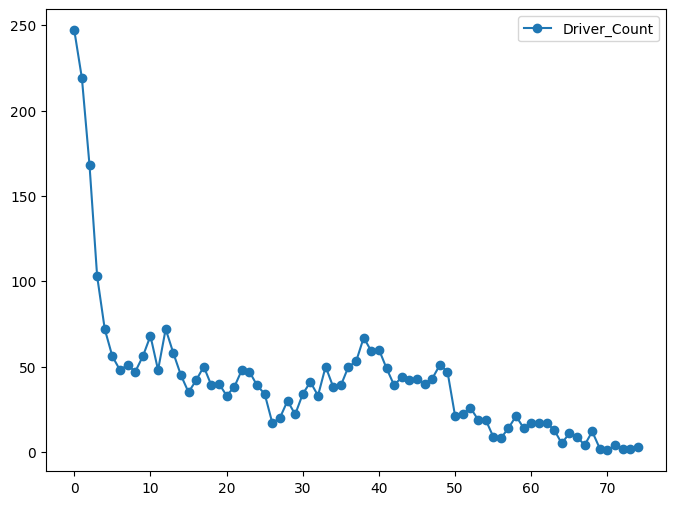

In [ ]:
grouped_data = pd.read_csv('compound_driver.csv')
grouped_data['Driver'] = grouped_data['Driver'].apply(eval) # unstring the data
grouped_data['Driver_Count'] = grouped_data['Driver'].apply(len)
grouped_data['Compound'] = grouped_data['Compound'].apply(eval)
grouped_data['Unique_Compund_Count'] = grouped_data['Compound'].apply(lambda x: len(list(set(x))))
plt.figure(figsize=(8, 6))
plt.plot(grouped_data['LapNumber'], grouped_data['Driver_Count'], marker='o' , label='Driver_Count')
plt.legend()
plt.show()

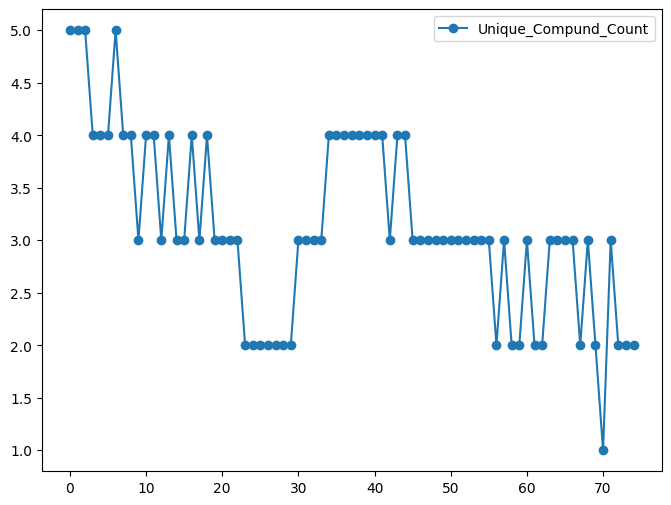

In [ ]:
plt.figure(figsize=(8, 6))

plt.plot(grouped_data['LapNumber'], grouped_data['Unique_Compund_Count'], marker='o', label='Unique_Compund_Count')
plt.legend()
plt.show()

In [ ]:
grouped_data = pd.read_csv('compound_driver.csv')
# Convert the string representation of lists to actual lists
grouped_data['Compound'] = grouped_data['Compound'].apply(eval)
# Explode the 'Compound' column to unlist it
grouped_data = grouped_data.explode('Compound')
category_mapping = {
    'SOFT': 0,
    'MEDIUM': 1,
    'HARD': 2,
    'INTERMEDIATE': 3,
    'WET': 4
}

grouped_data['Compound_Encoded'] = grouped_data['Compound'].map(category_mapping)
grouped_data.describe()

,LapNumber,Compound_Encoded
count,3106.000000,3106.000000
mean,22.971024,1.568577
std,19.232583,0.825888
min,0.000000,0.000000
25%,4.000000,1.000000
50%,19.000000,2.000000
75%,39.000000,2.000000
max,74.000000,4.000000
